**PREDICTION OF ACTIVE REGULATORY REGIONS**

Working on the "HG38" dataset and the "HEK293" cell line, we consider the following task:


1.   Active Enhancers vs Inactive Enhancers (AE vs IE)
2.   Active Promoters vs Inactive Promoters (AP vs IP)



### Install

In [ ]:
!pip install -q epigenomic_dataset ucsc_genomes_downloader keras_bed_sequence umap-learn tsnecuda minepy
!pip install -q keras_mixed_sequence
!pip install -q keras-tqdm extra_keras_metrics

### Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import keras
from tqdm.auto import tqdm

from epigenomic_dataset import active_enhancers_vs_inactive_enhancers, active_promoters_vs_inactive_promoters

2023-01-20 10:18:40.208686: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
windows_size=256
cell_line= "HEK293"
genome= "hg38"

### Data

Scarichiamo i dati dalla repository attrverso la funzione presente nella libreria epigenomes_data, specificando che la cell line richiesta è "HEK293".

In [4]:
enhancers_epigenomes, enhancers_labels= active_enhancers_vs_inactive_enhancers(
    assembly= genome,
    cell_line=cell_line
)
promoters_epigenomes, promoters_labels= active_promoters_vs_inactive_promoters(
    assembly= genome,
    cell_line=cell_line
)

In [5]:
epigenomes={ "promoters": promoters_epigenomes, "enhancers": enhancers_epigenomes}
labels={"promoters": promoters_labels, "enhancers": enhancers_labels}

### Espolarazione dati

In [6]:
epigenomes['promoters'].shape, epigenomes['enhancers'].shape
labels['promoters'].shape
epigenomes['promoters'].info(), epigenomes['enhancers'].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 99881 entries, ('chr1', 628964, 629220, '+') to ('chrY', 14055973, 14056229, '+')
Columns: 196 entries, SP7 to KLF1
dtypes: float64(196)
memory usage: 155.9+ MB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 63285 entries, ('chr10', 100006381, 100006637, '.') to ('chrY', 8007562, 8007818, '.')
Columns: 196 entries, SP7 to KLF1
dtypes: float64(196)
memory usage: 100.2+ MB


(None, None)

(99881, 196) (63285, 196)
(99881, 1) (63285, 1)


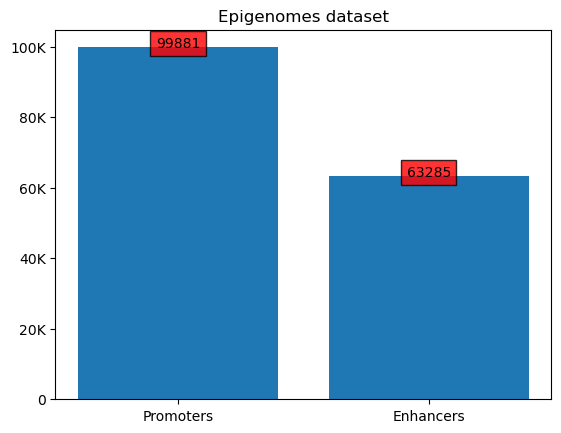

In [9]:
print(epigenomes['promoters'].shape, epigenomes['enhancers'].shape)
print(labels['promoters'].shape, labels['enhancers'].shape)

x=['Promoters','Enhancers']
height=[epigenomes['promoters'].shape[0],epigenomes['enhancers'].shape[0]]

chart= plt.bar( x=x, height=height )
plt.title("Epigenomes dataset")
for i in range(2):
    plt.text(i, height[i], height[i], ha='center',bbox= dict(facecolor='red', alpha=.8))

plt.yticks([0,20000,40000,60000,80000,100000], 
           ["0", "20K", "40K", "60K", "80K", "100K"])
plt.show()


In [10]:
epigenomes['promoters']

chrom                               SP7  ZNF23   SP2  ZNF843  ZNF510  ZSCAN16  \
chrom chromStart chromEnd  strand                                               
chr1  628964     629220    +       0.25   0.57  0.58    0.49    0.57     0.77   
      629013     629269    +       0.31   0.56  0.43    0.47    0.43     0.55   
      629642     629898    +       0.16   0.06  0.03    0.13    0.04     0.06   
      629847     630103    +       0.89   0.54  0.32    1.20    0.33     0.89   
      629905     630161    +       1.17   0.77  0.33    1.57    0.41     1.15   
...                                 ...    ...   ...     ...     ...      ...   
chrX  154441877  154442133 +       0.87   1.43  1.00    0.69    0.61     0.46   
      154584927  154585183 +       0.00   0.00  0.00    0.00    0.00     0.00   
chrY  1452882    1453138   -       0.00   0.00  0.00    0.00    0.00     0.00   
      2500959    2501215   -       0.00   0.00  0.00    0.00    0.00     0.00   
      14055973   14056229  +       0.00   0.00  0.00    0.00    0.00     0.00   

chrom                              ZNF629  ZBTB7A  ZNF133  ZNF707  ...  ZNF16  \
chrom chromStart chromEnd  strand                                  ...          
chr1  628964     629220    +         0.41    0.91    0.47    0.88  ...   0.48   
      629013     629269    +         0.47    0.70    0.41    1.19  ...   0.57   
      629642     629898    +         0.07    0.01    0.17    0.17  ...   0.21   
      629847     630103    +         0.72    0.60    0.84    1.99  ...   0.91   
      629905     630161    +         0.77    0.81    1.24    2.45  ...   1.04   
...                                   ...     ...     ...     ...  ...    ...   
chrX  154441877  154442133 +         1.02    1.54    1.31    1.01  ...   0.96   
      154584927  154585183 +         0.00    0.00    0.00    0.00  ...   0.00   
chrY  1452882    1453138   -         0.00    0.00    0.00    0.00  ...   0.00   
      2500959    2501215   -         0.00    0.00    0.00    0.00  ...   0.00   
      14055973   14056229  +         0.00    0.00    0.00    0.00  ...   0.00   

chrom                              GLI2  BCL11B  ZNF114  ZNF366  ZNF547  \
chrom chromStart chromEnd  strand                                         
chr1  628964     629220    +       0.35    1.07    0.80    0.52    0.93   
      629013     629269    +       0.36    0.80    0.78    0.42    0.83   
      629642     629898    +       0.15    0.21    0.25    0.30    0.11   
      629847     630103    +       0.88    0.75    1.08    1.19    0.60   
      629905     630161    +       1.09    0.71    1.16    1.46    0.65   
...                                 ...     ...     ...     ...     ...   
chrX  154441877  154442133 +       1.37    1.30    1.47    0.78    0.34   
      154584927  154585183 +       0.00    0.00    0.00    0.00    0.00   
chrY  1452882    1453138   -       0.00    0.00    0.00    0.00    0.00   
      2500959    2501215   -       0.00    0.00    0.00    0.00    0.00   
      14055973   14056229  +       0.00    0.00    0.00    0.00    0.00   

chrom                              SCRT2  ZSCAN5A  ZNF202  KLF1  
chrom chromStart chromEnd  strand                                
chr1  628964     629220    +        0.53     0.64    0.47  0.88  
      629013     629269    +        0.59     0.71    0.39  0.88  
      629642     629898    +        0.26     0.19    0.07  0.04  
      629847     630103    +        1.31     1.46    0.82  0.63  
      629905     630161    +        1.24     1.61    0.97  0.83  
...                                  ...      ...     ...   ...  
chrX  154441877  154442133 +        0.71     0.89    0.97  1.18  
      154584927  154585183 +        0.00     0.00    0.00  0.00  
chrY  1452882    1453138   -        0.00     0.00    0.00  0.00  
      2500959    2501215   -        0.00     0.00    0.00  0.00  
      14055973   14056229  +        0.00     0.00    0.00  0.00  

[99881 rows x 196 columns]

### Sample and features rate

Andiamo a vedere il numero di feautes e di sample. Andando ad analizzare il loro rate. Se ci sono più features che sample potrebbe provocare un problema di overfitting al modello che andremo a studiare. 

In [13]:
for region, x in epigenomes.items():
    samples, features = x.shape
    rate = round(samples/features, 3)
    print(f"{region.upper()}: \nThere are {samples} and {features} features with rate {rate}")
    print("*"*60)

PROMOTERS: 
There are 99881 and 196 features with rate 509.597
************************************************************
ENHANCERS: 
There are 63285 and 196 features with rate 322.883
************************************************************


Siccome il rate è un numero maggiore di uno, le due classi sono ben rappresentate.

### NaN detection

I Nan sono dei dati o dei valori mancanti. E' importante valutare se sono presenti, perchè potrebbero portare degli errori all'interno delle predizioni.
Se i dati mancanti sono in percentuale minore del 5/10% si va a imputare i dati, altrimenti si devono droppare i dati mancanti.

In [14]:
def rate(x, y):
  return round( x/y ,4)

In [15]:
for name, data in {"data": epigenomes, "labels": labels}.items():
  print(f"\t\t\t\t{name.upper()}:")
  for region, x in data.items():
    samples, features = epigenomes[region].shape
    print( f"{region.upper()}: \n",
      f"In the dataframe there are {x.isna().values.sum()} NaN values out of {x.values.size} values ({rate(x.isna().values.sum(), x.values.size)}%).\n",
      f"In the sample there are {x.isna().sum().max()} NaN values out of {samples} values. ({rate(x.isna().sum().max(),samples)}%)\n",
      f"In the features there are {x.isna().sum(axis=1).max()} NaN values out of {features} values ({rate(x.isna().sum(axis=1).max(), features)}%). ")
    print("*"*80)

				DATA:
PROMOTERS: 
 In the dataframe there are 0 NaN values out of 19576676 values (0.0%).
 In the sample there are 0 NaN values out of 99881 values. (0.0%)
 In the features there are 0 NaN values out of 196 values (0.0%). 
********************************************************************************
ENHANCERS: 
 In the dataframe there are 1 NaN values out of 12403860 values (0.0%).
 In the sample there are 1 NaN values out of 63285 values. (0.0%)
 In the features there are 1 NaN values out of 196 values (0.0051%). 
********************************************************************************
				LABELS:
PROMOTERS: 
 In the dataframe there are 0 NaN values out of 99881 values (0.0%).
 In the sample there are 0 NaN values out of 99881 values. (0.0%)
 In the features there are 0 NaN values out of 196 values (0.0%). 
********************************************************************************
ENHANCERS: 
 In the dataframe there are 0 NaN values out of 63285 values (0.0%).
 In

Come si nota tutte le percentuali sono al di sotto del 5% quindi non c'è bisogno di droppare i dati, ma possiamo procedere con l'imputazione. \
Questi risultati potrebbero essere dovuti al fatto che i dati utilizzati sono già stati pre processati. 


### Data Imputation

La data imputation è una tecnica che va a sostituire i valori mancanti con una stima dedotta dalle informazioni.\
Esistono diversi tipi di imputazione:


*   *Constant value*: permette di riampazzare i dati mancanti con un valore costante;
*   *Mean imputation*: permette di sostituire i dati mancanti con la media
*   *Median imputation*: sostituisce i dati mancanti con la mediana, che è un indice robusto. Si utilizza soprattutto per imputari dati che seguono una distribuzione gaussiana,
*   *Mode imputation*: sostituisce i dati mancanti con la moda, un indice robusto.
*  *KNN Imputation*: utilizza la distanza euclidea per imputare il dato mancante. è utile quando si hanno classi non uniformemente distribuite.  



In questo progetto andremo ad utilizzare la Neighbours imputation che preleva le informazioni dai K vicini e ne esegue una stima.\
Siccome la classe enhancer ha un dato mancante vado ad imputare sono quei dati.

Per andare a scegliere il tipo di imputazione, andiamo ad analizzare i dati. Vediamo se sono presenti degli outliers e che distribuzione seguono.  

In [16]:
data_imp = epigenomes["enhancers"]
data_imp.describe()

chrom           SP7         ZNF23           SP2        ZNF843        ZNF510  \
count  63285.000000  63285.000000  63285.000000  63285.000000  63285.000000   
mean       1.216708      0.830976      1.097803      0.938691      0.797861   
std        1.484867      0.358262      1.948904      0.701737      0.362030   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.540000      0.590000      0.530000      0.570000      0.550000   
50%        0.840000      0.810000      0.760000      0.830000      0.760000   
75%        1.310000      1.040000      1.070000      1.140000      1.000000   
max       44.830000     22.920000     69.620000     24.490000      8.260000   

chrom       ZSCAN16        ZNF629        ZBTB7A        ZNF133        ZNF707  \
count  63285.000000  63285.000000  63285.000000  63285.000000  63285.000000   
mean       0.855550      1.240698      0.918477      0.878722      0.811719   
std        0.425754      1.914525      0.460696      0.481647      0.368286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.590000      0.540000      0.610000      0.580000      0.560000   
50%        0.820000      0.830000      0.870000      0.840000      0.790000   
75%        1.080000      1.260000      1.170000      1.120000      1.030000   
max       15.800000     85.530000      8.470000     21.460000      6.080000   

chrom  ...         ZNF16          GLI2        BCL11B        ZNF114  \
count  ...  63285.000000  63285.000000  63285.000000  63285.000000   
mean   ...      0.841161      0.825352      0.865534      0.782872   
std    ...      0.431001      0.411276      0.471844      0.332462   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.550000      0.550000      0.560000      0.550000   
50%    ...      0.810000      0.780000      0.810000      0.760000   
75%    ...      1.090000      1.040000      1.090000      0.980000   
max    ...     18.300000      9.920000     11.620000      4.320000   

chrom        ZNF366        ZNF547         SCRT2       ZSCAN5A        ZNF202  \
count  63285.000000  63285.000000  63285.000000  63285.000000  63285.000000   
mean       1.061949      0.836380      0.995229      0.866315      0.761644   
std        0.874505      0.437163      1.045846      0.377577      0.386999   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.590000      0.550000      0.570000      0.610000      0.500000   
50%        0.860000      0.790000      0.790000      0.840000      0.710000   
75%        1.240000      1.070000      1.090000      1.090000      0.970000   
max       23.420000     19.080000     39.870000      4.540000      7.950000   

chrom          KLF1  
count  63285.000000  
mean       1.140811  
std        1.778188  
min        0.000000  
25%        0.560000  
50%        0.830000  
75%        1.180000  
max       90.850000  

[8 rows x 196 columns]

In [17]:
mean =data_imp.describe().loc['mean']
mean_norm = mean-mean.mean()/mean.std()

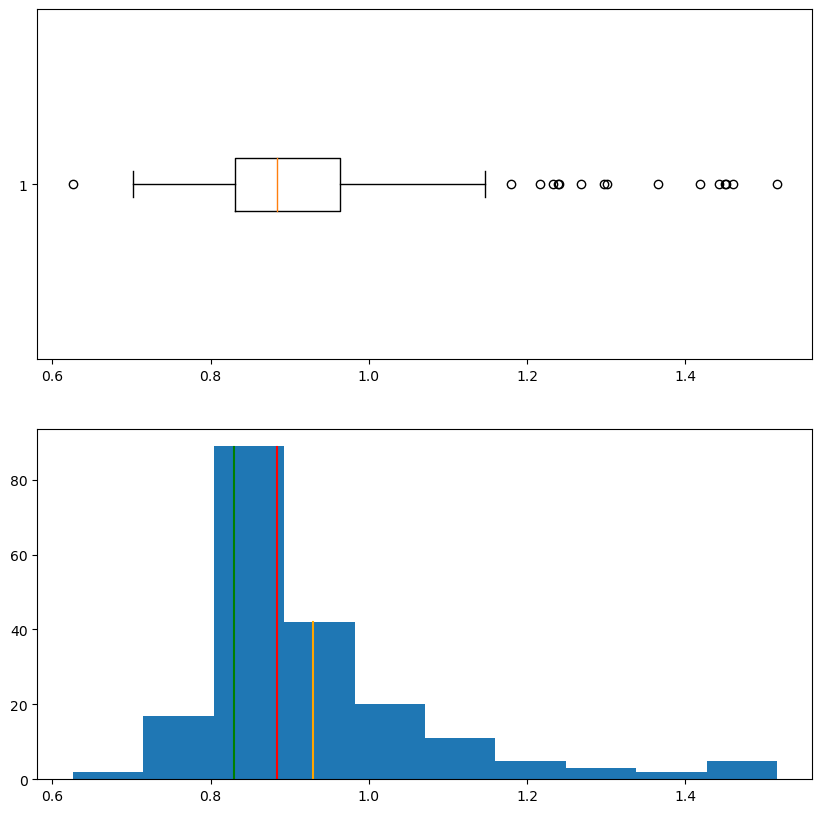

In [18]:
mode= round(mean,2).mode()
fig, axes = plt.subplots(2,1,figsize=(10,10))
axes[0].boxplot(x=mean, vert=False)
plt.axvline(mean.median(), c= "red", ymax=0.95)
plt.axvline(np.mean(mean), c= "orange", ymax=0.45)
plt.axvline(mode[0], c="green", ymax=0.95)
axes[1].hist(mean)

plt.show()

Come possiamo notare dai grafici, i dati presentano degli outliers e non hanno una distribuzione uniforme. Quindi si decide di procedere con KNN Imputation. 
Moda>Mediana>Media -> Assimetria a sinistra, quindi non è una distribuzione uniforme decido di utilizzare un'imputazione di tipo KNN.

In [19]:
from sklearn.impute import KNNImputer

def knn_imputer(df:pd.DataFrame, neighbours:int=5)->pd.DataFrame:
  """
  Impute NaN values within given dataframe using the KNNImputer from sklearn.

  Input:
    df:pd.DataFrame
      The dataframe to impute.
    
    neighbours: int=5
      the number of neighbour to consider. It is set on five.
  
  Output:
    pd.DataFrame
      The dataframe with the NaN values imputed.
  """
  return pd.DataFrame(
        KNNImputer(n_neighbors=neighbours).fit_transform(df.values),
        columns=df.columns,
        index=df.index)


In [20]:
epigenomes["enhancers"] = knn_imputer(epigenomes["enhancers"])

Controlliamo che l'imputazione è andata a buonfine.

In [21]:
assert(epigenomes["enhancers"].isna().values.sum()==0)
assert(epigenomes["enhancers"].isna().sum(axis=0).max()==0)
assert(epigenomes["enhancers"].isna().sum().max()==0)

### Class balance

E' importante andare a vedere, soprattutto se vogliamo fare una classificazione binaria,  se una classe è più rappresentata rispetto all'altra, perchè potremmo ricorre nel ago nel pagliaio. Avere troppo esempi di una e pochi di una altra, quindi rendere molto difficile la classificazione.

/tmp/ipykernel_79450/1352747968.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


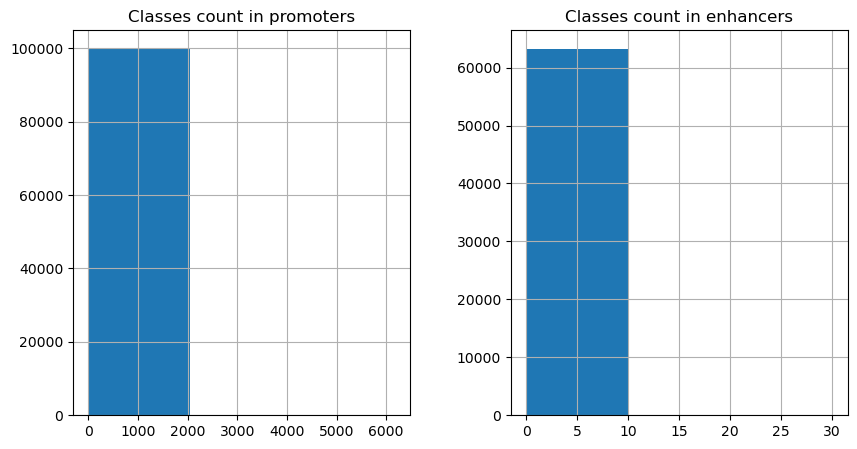

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

for axis, (region, y) in zip(axes.ravel(), labels.items()):
    y.hist(ax=axis, bins=3)
    axis.set_title(f"Classes count in {region}")
fig.show()

Dobbiamo andare a trovare una threshold in grado di binarizzare le classi. 

/tmp/ipykernel_79450/3333217458.py:4: RuntimeWarning: divide by zero encountered in log
  a,b,c = axis.hist(np.log(y.values>0.01).astype(int))


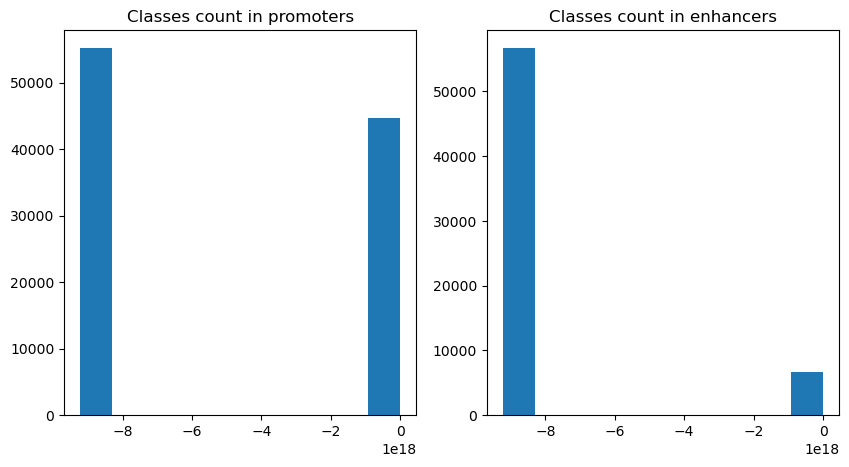

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
asb=[]
for axis, (region, y) in zip(axes.ravel(), labels.items()):
    a,b,c = axis.hist(np.log(y.values>0.01).astype(int))
    asb.append(a)
    #for c in axis.containers:
     # axis.bar_label(c)
    axis.set_title(f"Classes count in {region}")
plt.show()

In questo caso si utilizza una threshold unica pari a 0.01 come suggerito dalle indicazioni di Luca Cappelletti in questo articolo: INSERIRE QUI

In [24]:
a[0], a[-1], a[0]/a[-1]

(56641.0, 6644.0, 8.525135460565924)

In [25]:
ak=[]
for i in asb[0]:
   if i!=0:
     ak.append(i)
for i in asb[1]:
  if i !=0:
    ak.append(i)
print(ak)

ak[0]/ak[1] > 1/10, ak[2]/ak[3] > 1/10

[55134.0, 44747.0, 56641.0, 6644.0]


(True, True)

In [26]:
values_to_return=(0,1)
threshold= (0,5)
f = lambda value: values_to_return[0] if value == threshold[0]\
                                        else ( values_to_return[1] if value >= threshold[1] 
                                                                   else None
                                              )     

In [27]:
map(lambda kv: (kv[0], f(kv[1])), labels.items())
values_to_return

(0, 1)

### Constant features

Un'altro elemento da andare a valutare è se ci sono delle features identiche ad altre.\
Se sono presenti, andranno tolte perchè non aggiungono nulla in più per la computazione.

In [28]:
def count_drop_constant_features(df:pd.DataFrame)->int:
    """Return a size of dataframe without constant features."""
    return df.loc[:, (df != df.iloc[0]).any()].shape[0]

In [29]:
for region,x in epigenomes.items():
  assert( x.shape[0] - count_drop_constant_features(x) == 0) , f"In {region} there are some constant features."
  print(f"In {region} there aren't constant features.")

In promoters there aren't constant features.
In enhancers there aren't constant features.


Non ci sono features costanti.

### Normalizzazione

Andiamo a normalizzare i dati attraverso il Z-scoring robust scaler. 
Il Z-scoring è un metodo di normalizzazione dati che viene calcolata attraverso la sottrazione dei dati per la mediana e si divide per la deviazione standard calcolata tra il primo e il terzo quartile. 

In [30]:
old_epigenomes=epigenomes

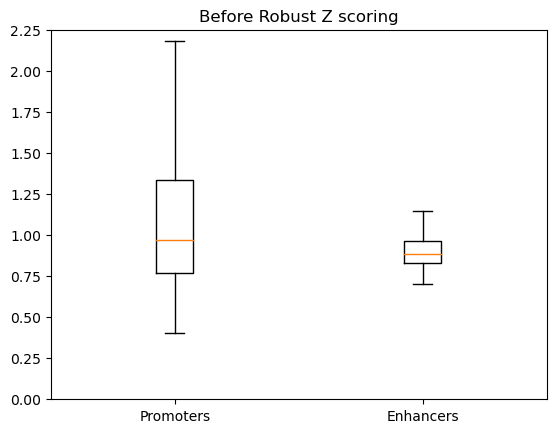

In [31]:
plt.boxplot(
    [old_epigenomes['promoters'].describe().loc['mean'], old_epigenomes['enhancers'].describe().loc['mean'] ],
    labels=['Promoters', 'Enhancers'],
    showfliers=False
)
plt.ylim(0,2.25)
plt.title("Before Robust Z scoring")
plt.show()

In [32]:
from sklearn.preprocessing import RobustScaler

In [33]:
def robust_zscoring(df:pd.DataFrame)->pd.DataFrame:
    """Return given dataframe scaled using robust z-scoring."""
    return pd.DataFrame(
        RobustScaler().fit_transform(df.values),
        columns=df.columns,
        index=df.index
    )

In [34]:
for region, x in epigenomes.items():
    epigenomes[region] = robust_zscoring(x)

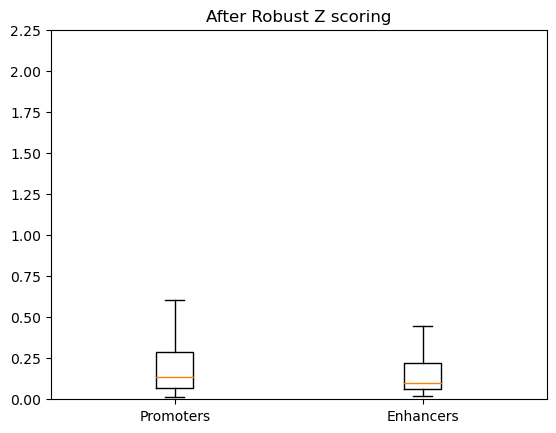

In [35]:
plt.boxplot(
    [epigenomes['promoters'].describe().loc['mean'], epigenomes['enhancers'].describe().loc['mean'] ],
    labels=['Promoters', 'Enhancers'],
    showfliers=False
)
plt.title("After Robust Z scoring")
plt.ylim(0, 2.25)
plt.show()

### Correlation with output

Le features che non hanno alcuna correlazione con l'output sono delle feauters da droppare, perchè inutili. 

In [37]:
p_value_threshold = 0.01
correlation_threshold = 0.05

uncorrelated={
    region: set()
    for region in epigenomes
}

**Linear correlations: The Pearson correlation**\
Iniziamo con l'algoritmo di Pearson, per individuare la correlazione lineare.\
La correlazione di pearson misura la relazione lineare tra due dataset.\
L'indice sarà sempre compreso tra i valori -1 e +1. Più è vicino allo zero, più la relazione sarà debole, più si avvicina a -1 oppure a +1 più la relazione sarà forte negativamente o forte positivamente. 

In [38]:
from scipy.stats import pearsonr

for region, x in epigenomes.items():
    for column in tqdm(x.columns, desc=f"Running Pearson test for {region}", dynamic_ncols=True, leave=False):
        correlation, p_value = pearsonr(x[column].values.ravel(), labels[region].values.ravel())
        if p_value > p_value_threshold:
            print(region, column, correlation, "pvalue", p_value)
            uncorrelated[region].add(column)

Running Pearson test for promoters:   0%|          | 0/196 [00:00<?, ?it/s]

promoters ZNF510 -0.00036060205494278113 pvalue 0.9092670524967862
promoters RBAK -0.0035747001200721273 pvalue 0.25858743932435924
promoters ZNF350 0.002471308405590072 pvalue 0.43478918766035357
promoters ZNF423 -0.0019564568153962636 pvalue 0.5363706199823879
promoters ZNF645 -0.005738988256321766 pvalue 0.06971783654866615
promoters ZNF398 -0.0008281539363144165 pvalue 0.7935325625592742
promoters ZNF626 0.0068744532868341545 pvalue 0.029810614223805702
promoters BCL6B -0.003007479439403905 pvalue 0.34187211091182557
promoters AEBP2 -0.001319925269362092 pvalue 0.6765734084133924
promoters ZIC2 0.006735928777548943 pvalue 0.03326936780513684
promoters ZFP3 0.004637513831284265 pvalue 0.14274983798196555
promoters ZNF596 -0.006528156547849436 pvalue 0.03909820337864734
promoters GFI1B 0.008033479050987292 pvalue 0.011119959112388307
promoters ZNF488 -0.007237696496576227 pvalue 0.022172503444809682
promoters ZNF792 0.0067626433326956024 pvalue 0.032576811749597825
promoters ZNF624 -

Running Pearson test for enhancers:   0%|          | 0/196 [00:00<?, ?it/s]

enhancers ZNF133 -0.0014155221533869236 pvalue 0.7217738263250096
enhancers ZNF707 -0.0016514055144599823 pvalue 0.6778285597460755
enhancers RBAK -0.004917881829230425 pvalue 0.21603122103230474
enhancers ZNF354C -0.005587458351051637 pvalue 0.15984509580508657
enhancers ZNF777 -0.00300359165252334 pvalue 0.4498976822517138
enhancers ZNF680 -0.004954680265372261 pvalue 0.21261476644142915
enhancers ZNF645 0.005039635212067914 pvalue 0.2048767589395803
enhancers ZNF548 -0.008131087587798718 pvalue 0.04080644835746577
enhancers ZNF837 0.007761946696306293 pvalue 0.05086395809459674
enhancers ZNF768 -0.004250497835218323 pvalue 0.28495224731255303
enhancers ZNF626 0.0026161461552124737 pvalue 0.510461540519121
enhancers BCL6B -0.008290878092123423 pvalue 0.037006692030826446
enhancers ZNF791 -0.006036636427141966 pvalue 0.12886550534270833
enhancers AEBP2 0.0011202538028090097 pvalue 0.7780882189349666
enhancers ZNF529 -0.004853443839570646 pvalue 0.222108676340595
enhancers ZNF34 0.0040

**Monotonic correlation: The Spearman correlation**.\
Una relazione monotona tra due variabili si ottiene quando all'aumentare di una variabile aumenta anche (se in modo non lineare) l'altra. Oppure diminuisce all'aumentare dell'altra.\
Anche in questo caso il valore di correlazione è tra -1 e +1.\
Dove 0 corrisponde a non correlazione, mentre +1 e -1 indicano correlazione forte.


In [39]:
from scipy.stats import spearmanr

for region, x in epigenomes.items():
    for column in tqdm(x.columns, desc=f"Running Spearman test for {region}", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(x[column].values.ravel(), labels[region].values.ravel())
        if p_value > p_value_threshold:
            print(region, column, correlation)
            uncorrelated[region].add(column)
            

Running Spearman test for promoters:   0%|          | 0/196 [00:00<?, ?it/s]

promoters ZNF223 -0.007641899172849364
promoters AEBP2 0.0016860761115297122
promoters ZNF585B -0.0058158633093488
promoters ZNF302 -0.0031223387793037492


Running Spearman test for enhancers:   0%|          | 0/196 [00:00<?, ?it/s]

enhancers ZNF23 -0.0005631469057269541
enhancers ZNF530 -3.743437801217472e-05
enhancers ZNF433 -0.006030067144363969
enhancers ZNF777 0.0063562466033915965
enhancers ZBTB49 -0.0002684012307408213
enhancers ZNF768 0.0025177190859737354
enhancers BCL6B 8.184909891492308e-05
enhancers ZNF791 0.00916321623384231
enhancers PRDM2 0.007231755154433176
enhancers ZNF292 0.009279525537062678
enhancers ZNF677 0.0014471512403953688
enhancers ZNF404 0.01001621565342679
enhancers ZSCAN26 -0.009434314117636412
enhancers ZNF426 -0.0031701383460879654
enhancers ZNF155 0.009686074368532376
enhancers ZNF169 -0.00350661606284702
enhancers ZNF416 -0.010057450464331501
enhancers ZNF549 -0.006375743282376605
enhancers ZNF211 -0.0017179186552956085


**Non linear correlations: The Maximal information coefficent**\
Questo coefficente riesce a individuare relazioni che i precedenti coefficenti non riescono, come ad esempio relazioni circolari o polinomiali.\
Siccome ha un costo computazionale abbastanza elevato lo eseguiamo solo per le colonne che non sono linearmente e monotomicamente correlate.

In [44]:
from minepy import MINE

for region, x in epigenomes.items():
    for column in tqdm(uncorrelated[region], desc=f"Running MINE test for {region}", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(x[column].values.ravel(), labels[region].values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            print(region, column, score)
        else:
            uncorrelated[region].remove(column)

Running MINE test for promoters:   0%|          | 0/21 [00:00<?, ?it/s]

promoters ZNF350 0.02154361404265507
promoters GFI1B 0.015270007232163145
promoters ZNF223 0.01300422908866344
promoters RBAK 0.012062136068445847
promoters ZNF624 0.017623768818244494
promoters ZNF16 0.01355667225491862
promoters ZNF645 0.014195236483777377
promoters GLI2 0.011800086036705454
promoters ZFP3 0.014824980106951186
promoters ZNF792 0.01850298307285047
promoters ZNF510 0.01389484674871071
promoters ZNF148 0.018300451170286704
promoters ZNF423 0.026745492418973355
promoters ZNF626 0.01633081552136337
promoters ZNF596 0.03167592520724835
promoters ZNF302 0.010818038106560214
promoters BCL6B 0.022937634934506807
promoters AEBP2 0.012045746565567703
promoters ZNF585B 0.012952842402233199
promoters ZNF488 0.012741102813117711
promoters ZNF426 0.015828279874897804


Running MINE test for enhancers:   0%|          | 0/41 [00:00<?, ?it/s]

enhancers ZNF34 0.005290462291476851
enhancers PRDM2 0.003744845177806166
enhancers ZNF416 0.004804275552662968
enhancers ZNF23 0.0036573033752392795
enhancers RBAK 0.005185259424762877
enhancers ZNF624 0.004512013351647001
enhancers H3K4me1 0.010327357495888437
enhancers ZNF768 0.003981009173558932
enhancers ZNF292 0.004218001034747126
enhancers ZNF777 0.0051010513949622275
enhancers ZNF645 0.004266744543232832
enhancers ZNF654 0.014584549668703218
enhancers ZNF707 0.004457518564740802
enhancers ZNF157 0.004877536106512652
enhancers GLI2 0.005218873535378188
enhancers ZNF791 0.004252976211764764
enhancers ZNF169 0.00422998087110555
enhancers ZNF549 0.0044857234143696224
enhancers ZNF548 0.004579471785392384
enhancers ZNF529 0.00453861343705028
enhancers ZNF426 0.0039131697960632
enhancers ZNF266 0.004519001910795977
enhancers ZNF626 0.004733281359923767
enhancers ZNF155 0.004365323757881167
enhancers ZNF354C 0.004378372010353202
enhancers ZNF837 0.004553260703623125
enhancers ZNF433 0

### Features correlations

Procediamo con il riconoscere e rimuovere le features che hanno un Pearson correlazione migliore di 0.95.\
Mentre eseguiamo i test memorizzeremo il punteggio in modo da visualizzare i punteggi maggiori e minori di correlazione.

In [45]:
p_value_threshold= 0.01
correlation_threshold=0.95

In [46]:
from scipy.stats import spearmanr
from scipy.stats import entropy

extremely_correlated = {
    region: set()
    for region in epigenomes
}

scores = {
    region: []
    for region in epigenomes
}

for region, x in epigenomes.items():
    for i, column in tqdm(
        enumerate(x.columns),
        total=len(x.columns), desc=f"Running Pearson test for {region}", dynamic_ncols=True, leave=False):
        for feature in x.columns[i+1:]:
            correlation, p_value = pearsonr(x[column].values.ravel(), x[feature].values.ravel())
            correlation = np.abs(correlation)
            scores[region].append((correlation, column, feature))
            if p_value < p_value_threshold and correlation > correlation_threshold:
                print(region, column, feature, correlation)
                if entropy(x[column]) > entropy(x[feature]):
                    extremely_correlated[region].add(feature)
                else:
                    extremely_correlated[region].add(column)

Running Pearson test for promoters:   0%|          | 0/196 [00:00<?, ?it/s]

Running Pearson test for enhancers:   0%|          | 0/196 [00:00<?, ?it/s]

In [47]:
from scipy.stats import spearmanr

for region, x in epigenomes.items():
    for i, column in tqdm(
        enumerate(x.columns),
        total=len(x.columns), desc=f"Running Sperman test for {region}", dynamic_ncols=True, leave=False):
        for feature in x.columns[i+1:]:correlation, p_value = spearmanr(x[column].values.ravel(), labels[region].values.ravel())
            correlation = np.abs(correlation)
            scores[region].append((correlation,column, feature))
            if p_value < p_value_threshold and correlation > correlation_threshold:
                print(region, column, feature, correlation)
                if(entropy(x[column])> entropy(x[feature])):
                    extremely_correlated[region].add(feature)
                else:
                    extremely_correlated[region].add(column)            

Running Sperman test for promoters:   0%|          | 0/196 [00:00<?, ?it/s]

Running Sperman test for enhancers:   0%|          | 0/196 [00:00<?, ?it/s]

Non è stata trovata nemmeno una features correlata significamente con altre, quindi manteniamo tutte le features.

Non ha nemmeno senso andare a vedere MINE come si comporta.

Procediamo con il rimuovere le features che non sono linearmente, monotomicamente e non linearmente correlate con l'output, per quanto riguarda la correlazione con le features si fa a meno, essendo che non sono linearmente correlati.

In [51]:
for region, x in epigenomes.items():
    epigenomes[region]= x.drop(columns=[
                                      col 
                                      for col in uncorrelated[region]
                                      if col in x.columns
  ])

In [53]:
epigenomes['promoters'].to_csv('epigenomes_promoters.csv')

In [54]:
epigenomes['enhancers'].to_csv('epigenomes_enhancers.csv')

In [56]:
with open('uncorrelated.txt', 'w') as f:
    print(uncorrelated, file=f)

### Scatter plots


We will use seaborn's pairplot method to visualize the most correlated and least correlated features detected using the Pearson coefficient.

In [112]:
scores = {
    region:sorted(score, key=lambda x: np.abs(x[0]), reverse=True)
    for region, score in scores.items()
}

In [113]:
labels['promoters']

def labels_binarize(label_df):
    f= lambda value: 0 if value <= 0.01 else (1 if value >0.01 else None)
    return label_df.copy().applymap(f)



Most correlated features from promoters


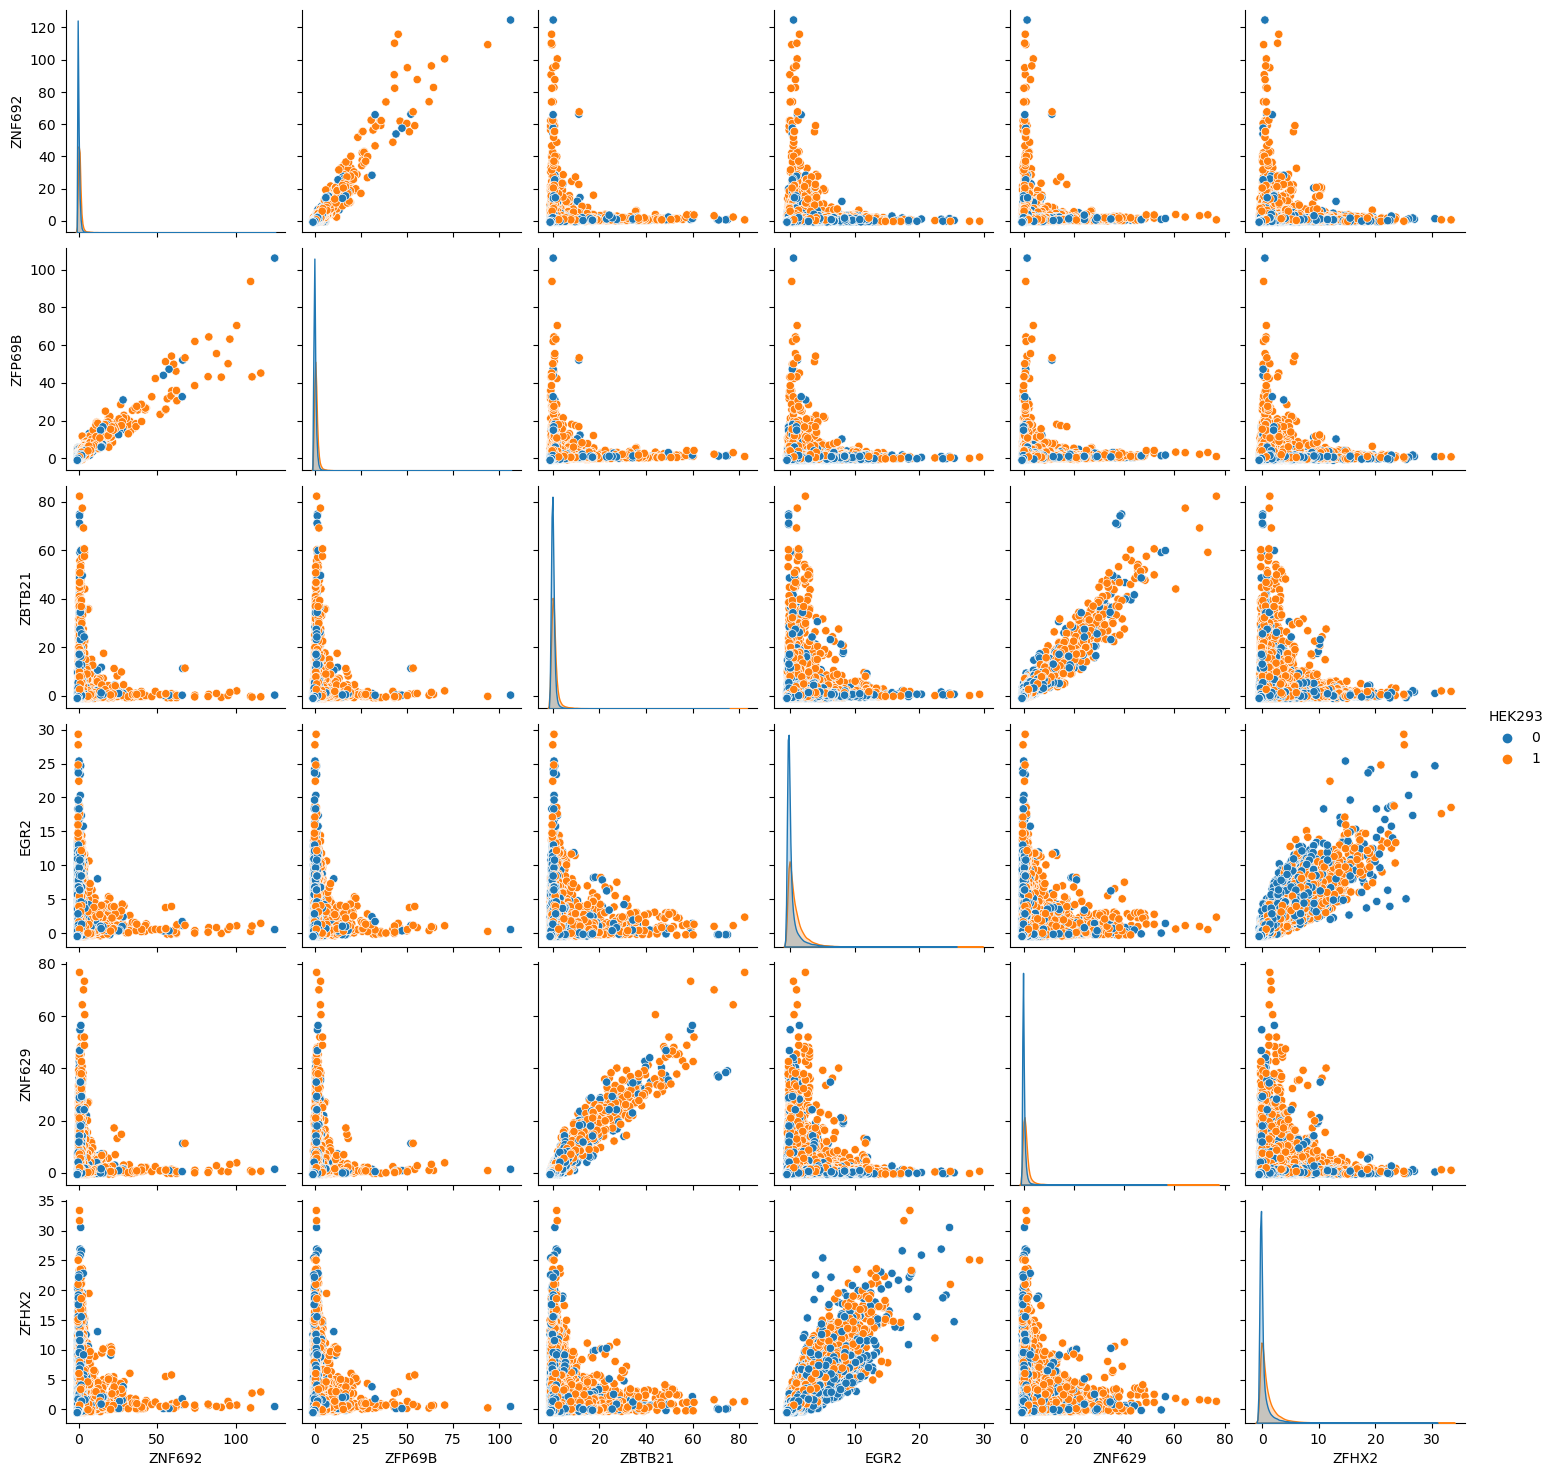

Most correlated features from enhancers


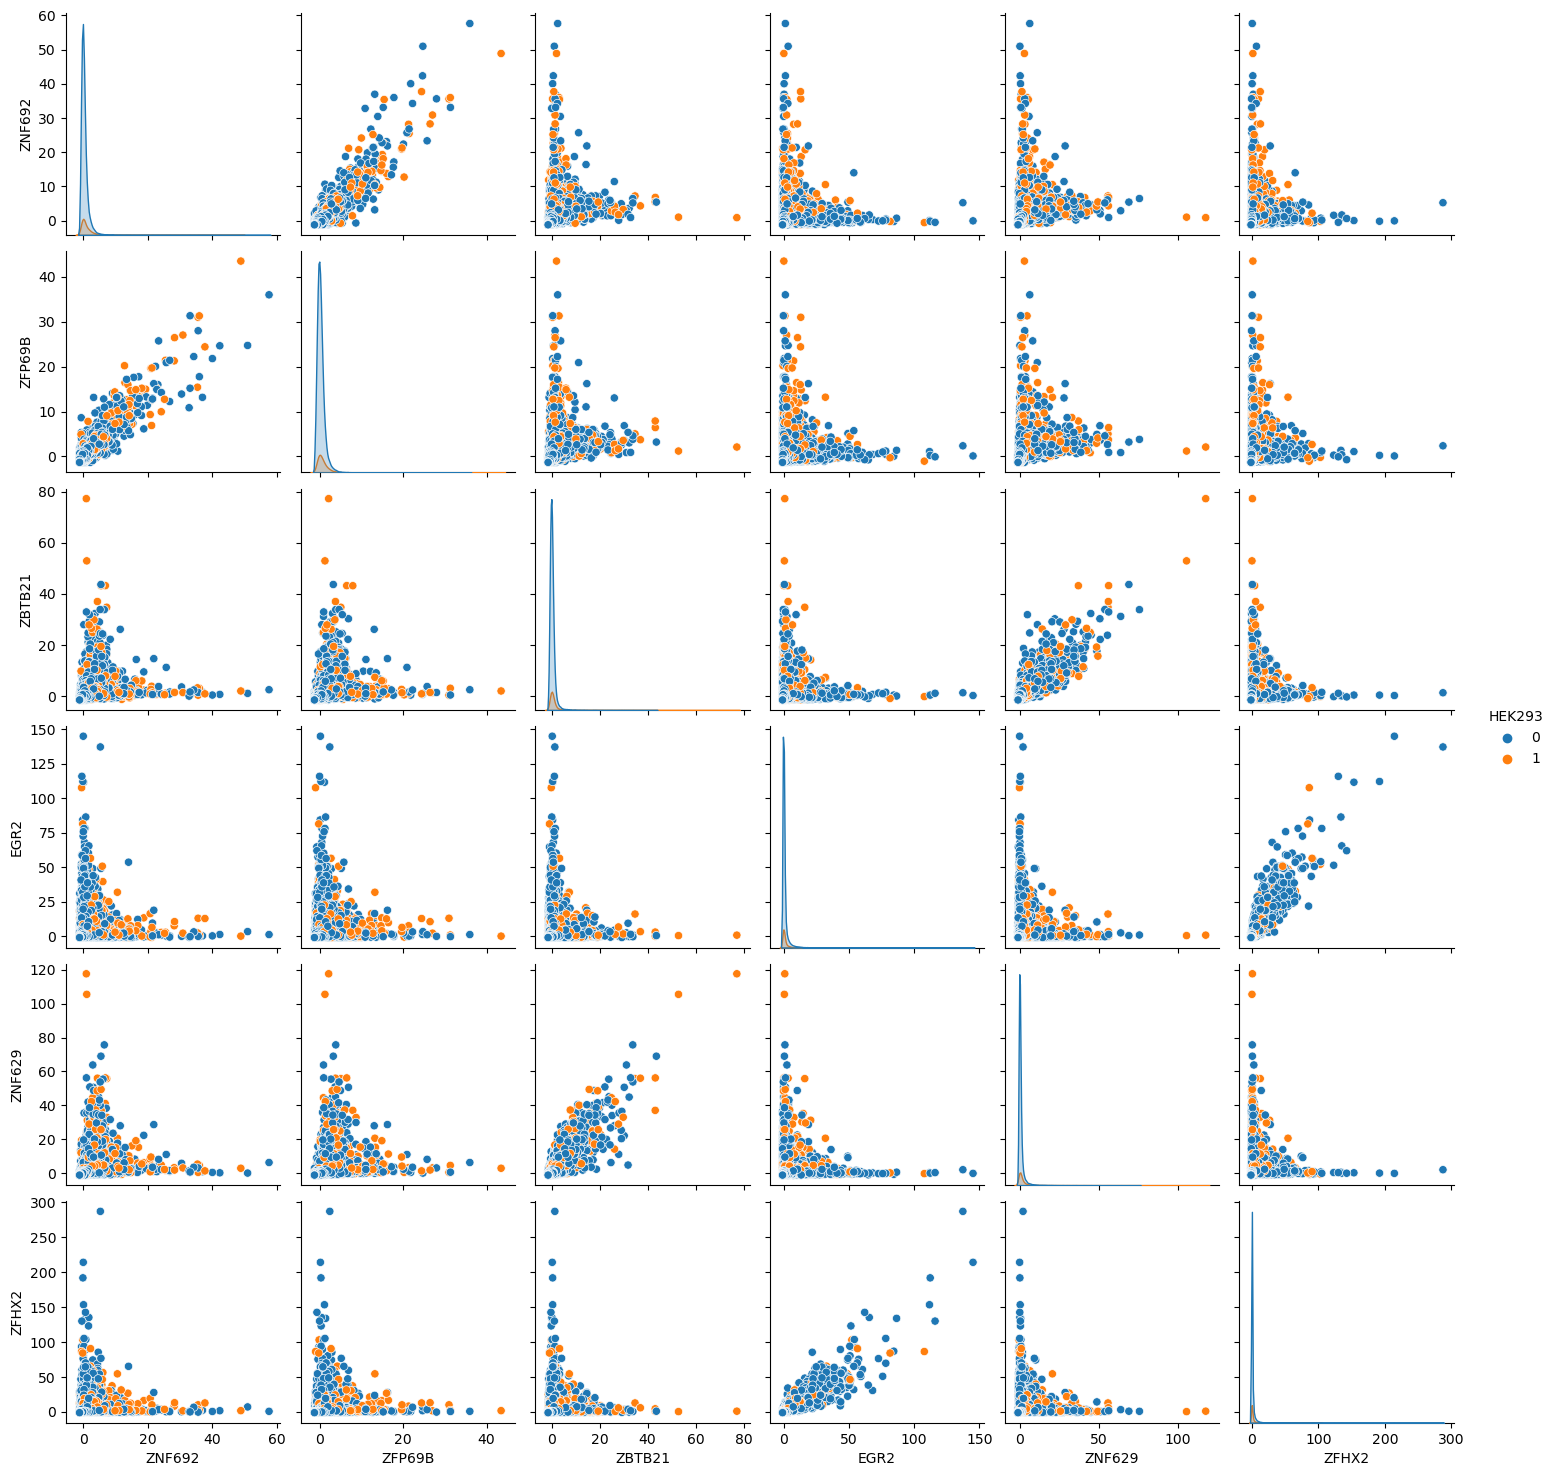

In [114]:
for region, x in epigenomes.items():
    _, first, second = list(zip(*scores[region][:3]))
    columns= list(set(first+second))
    print(f"Most correlated features from {region}")
    labels_binarized= labels_binarize(labels[region])
    sns.pairplot(pd.concat([
        x[columns],
        labels_binarized
    ], axis=1), hue=labels_binarized.columns[0])
    plt.show()

### Features distribution

In [127]:
from sklearn.metrics.pairwise import euclidean_distances

def get_top_most_different(dist, n:int):
    return np.argsort(-np.mean(dist, axis=1).flatten())[:n]

Top 5 different features from promoters.


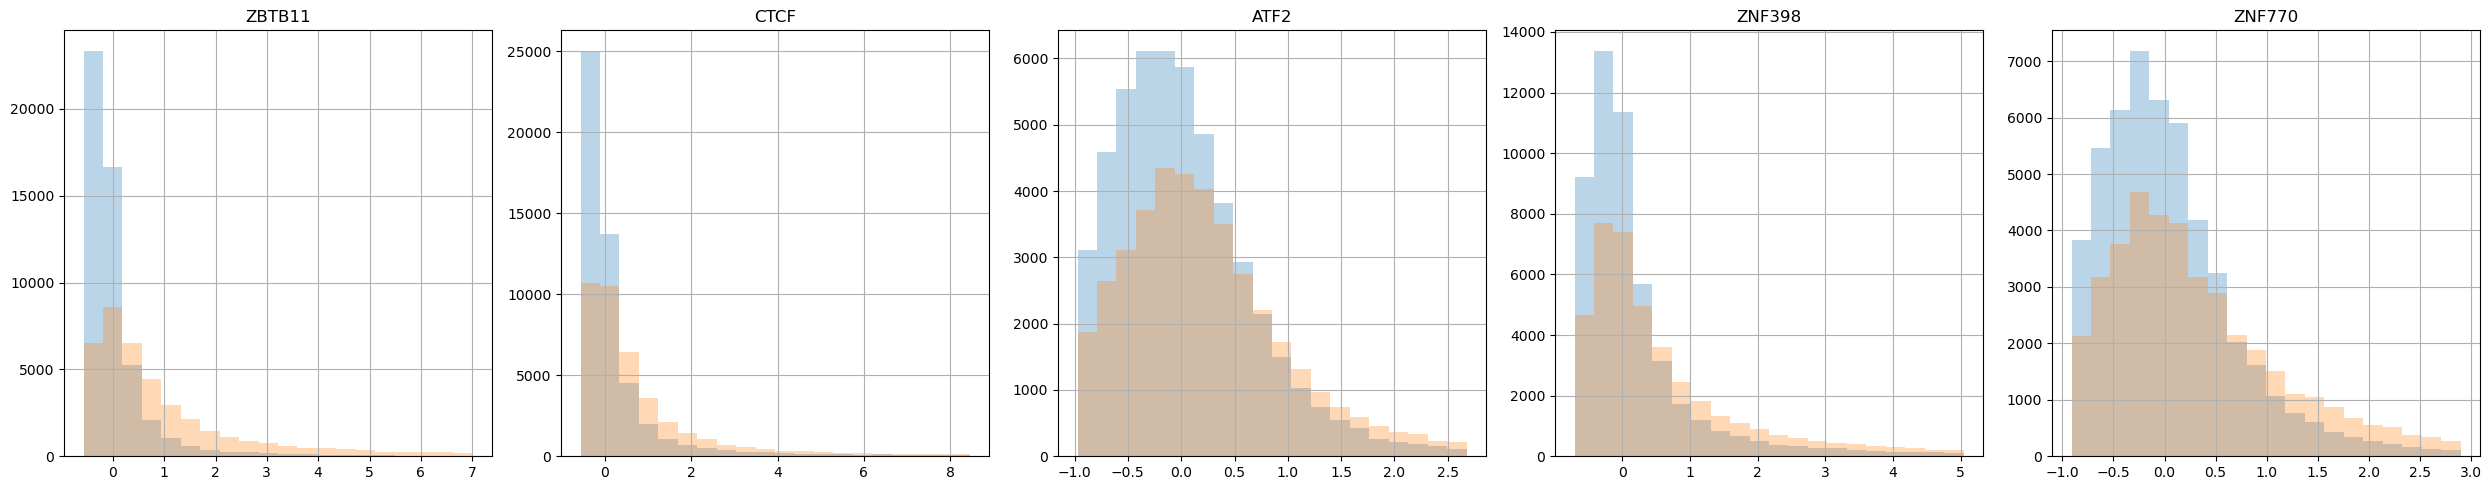

Top 5 different features from enhancers.


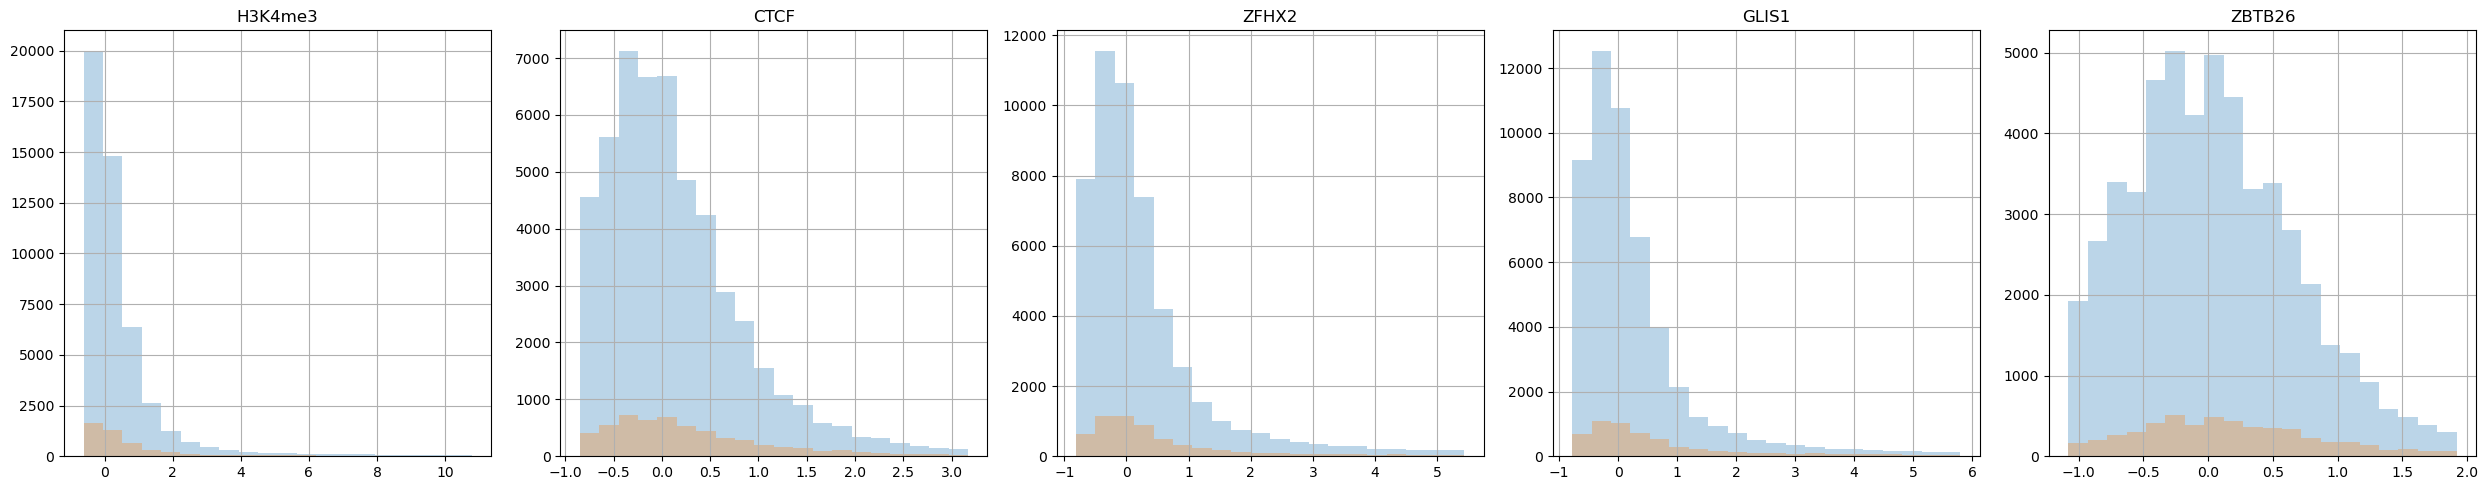

In [128]:
top_number = 5


for region, x in epigenomes.items():
    dist = euclidean_distances(x.T)
    most_distance_columns_indices = get_top_most_different(dist, top_number)
    columns = x.columns[most_distance_columns_indices]
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
    print(f"Top {top_number} different features from {region}.")
    
    for column, axis in zip(columns, axes.flatten()):
        head, tail = x[column].quantile([0.05, 0.95]).values.ravel()
        
        mask = ((x[column] < tail) & (x[column] > head)).values
        
        cleared_x = x[column][mask]
        binarized_labels=labels_binarize(labels[region])
        
        cleared_y = binarized_labels.values.ravel()[mask]
        
        for bin_value in np.unique(binarized_labels):
            cleared_x[cleared_y==bin_value].hist(ax=axis, bins=20, alpha = 0.3)

        axis.set_title(column)
    fig.tight_layout()
    plt.show()

## Genomic sequences

In [162]:
from ucsc_genomes_downloader import Genome

genome = Genome("hg38")

Loading chromosomes for genome hg38:   0%|          | 0/25 [00:00<?, ?it/s]

In [163]:
def to_bed(data:pd.DataFrame)->pd.DataFrame:
    """Return bed coordinates from given dataset."""
    return data.reset_index()[data.index.names]

In [164]:
to_bed(y)

chrom  chromStart   chromEnd strand
0      chr10   100006381  100006637      .
1      chr10   100008146  100008402      .
2      chr10   100014418  100014674      .
3      chr10   100020216  100020472      .
4      chr10   100043528  100043784      .
...      ...         ...        ...    ...
63280   chrY     7520247    7520503      .
63281   chrY     7724272    7724528      .
63282   chrY     7770029    7770285      .
63283   chrY     7796295    7796551      .
63284   chrY     8007562    8007818      .

[63285 rows x 4 columns]

## Data decomposition

In [253]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.colors import ListedColormap, LogNorm
from keras_bed_sequence import BedSequence
import umap.umap_ as umap

In [258]:
def get_pca_decomposition(X):
    return PCA(n_components=2).fit_transform(X.values)
                       
def get_tsne_decomposition(
    X: pd.DataFrame
)->pd.DataFrame:
    """Return the 2D TSNE decomposition of the given data."""
    # The import of the TSNECUDA is within the method and not
    # outside because it is hard to install the package
    TSNE()
    return TSNE(
            # Better performance may be achieved with cosine distance,
            # but currently TSNECUDA does not support other metrics.
            # Expecially for the sequence data, cosine distances may be foundamental
            # to get a semantically significant decomposition.
            perplexity= 100,
            n_iter = 1000,
            metric='cosine',
            verbose=True,
        ).fit_transform(X.values)
def get_umap_decomposition(X: pd.DataFrame):
    return umap.UMAP(n_neighbors=5,
                  min_dist=0.3,
                  n_components = 2,
                  metric='cosine').fit_transform(X.values)

/home/arianna/anaconda3/envs/progetto_bioinfo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/arianna/anaconda3/envs/progetto_bioinfo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 99881 samples in 0.030s...
[t-SNE] Computed neighbors for 99881 samples in 101.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 99881
[t-SNE] Computed conditional probabilities for sample 2000 / 99881
[t-SNE] Computed conditional probabilities for sample 3000 / 99881
[t-SNE] Computed conditional probabilities for sample 4000 / 99881
[t-SNE] Computed conditional probabilities for sample 5000 / 99881
[t-SNE] Computed conditional probabilities for sample 6000 / 99881
[t-SNE] Computed conditional probabilities for sample 7000 / 99881
[t-SNE] Computed conditional probabilities for sample 8000 / 99881
[t-SNE] Computed conditional probabilities for sample 9000 / 99881
[t-SNE] Computed conditional probabilities for sample 10000 / 99881
[t-SNE] Computed conditional probabilities for sample 11000 / 99881
[t-SNE] Computed conditional probabilities for sample 12000 / 99881
[t-SNE] Computed conditional probabilities for 

/home/arianna/anaconda3/envs/progetto_bioinfo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/arianna/anaconda3/envs/progetto_bioinfo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 63285 samples in 50.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 63285
[t-SNE] Computed conditional probabilities for sample 2000 / 63285
[t-SNE] Computed conditional probabilities for sample 3000 / 63285
[t-SNE] Computed conditional probabilities for sample 4000 / 63285
[t-SNE] Computed conditional probabilities for sample 5000 / 63285
[t-SNE] Computed conditional probabilities for sample 6000 / 63285
[t-SNE] Computed conditional probabilities for sample 7000 / 63285
[t-SNE] Computed conditional probabilities for sample 8000 / 63285
[t-SNE] Computed conditional probabilities for sample 9000 / 63285
[t-SNE] Computed conditional probabilities for sample 10000 / 63285
[t-SNE] Computed conditional probabilities for sample 11000 / 63285
[t-SNE] Computed conditional probabilities for sample 12000 / 63285
[t-SNE] Computed conditional probabilities for sample 13000 / 63285
[t-SNE] Computed conditional probabilities for sample 14000 / 6328

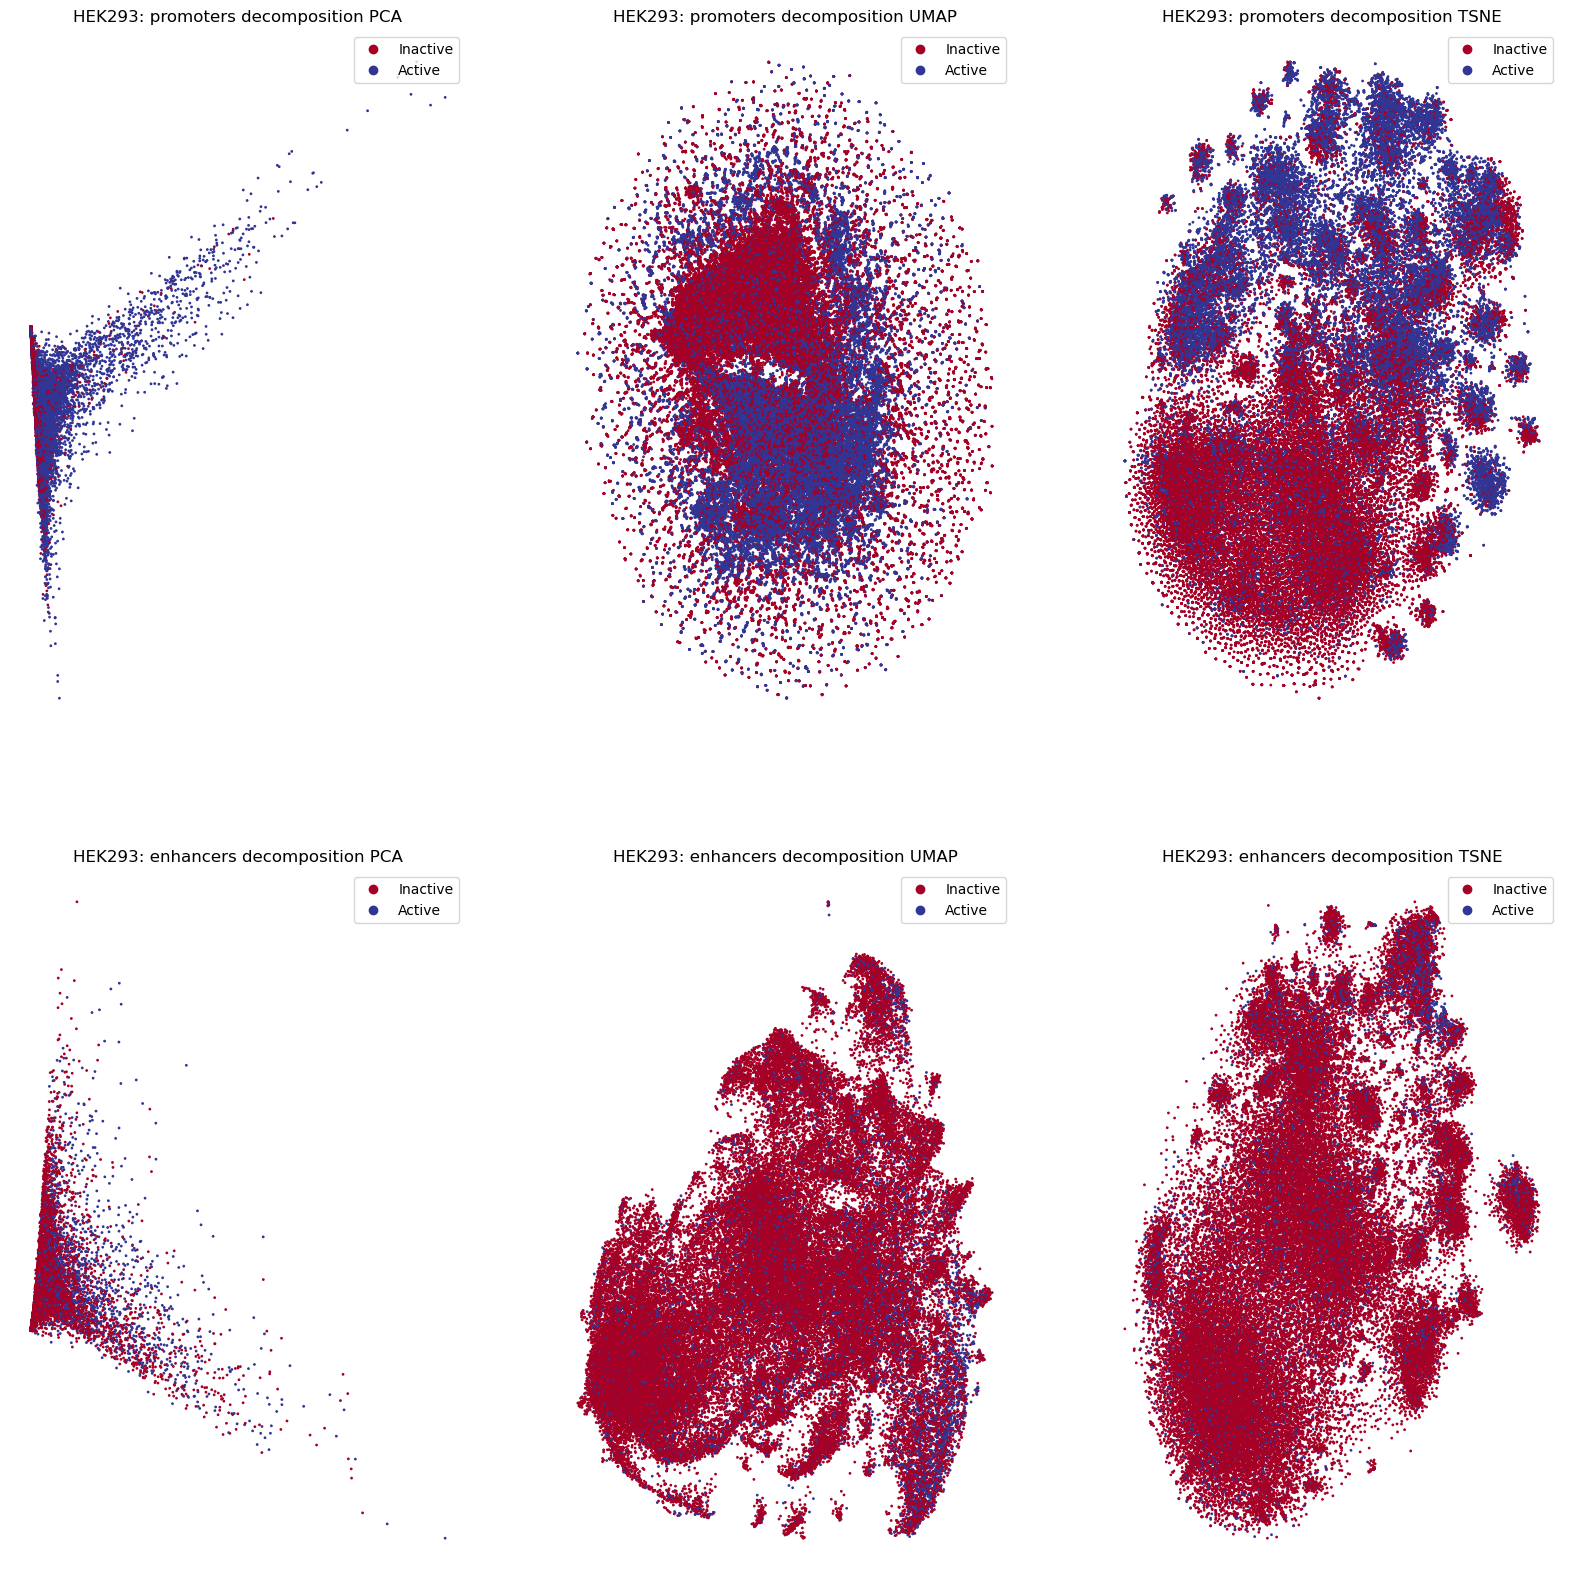

In [260]:
fig, axes= plt.subplots(nrows=2, ncols=3,figsize=(20,20), squeeze=False, dpi=100)

for dec, t in enumerate(['PCA', 'UMAP', 'TSNE']):
    for i, (region, x) in enumerate(epigenomes.items()):
        if t == 'PCA':
            decomposed=get_pca_decomposition(x)
        elif t=='TSNE':
            decomposed= get_tsne_decomposition(x)
        else:
            decomposed=get_umap_decomposition(x)
        scatter=axes[i][dec].scatter( 
            *decomposed.T,
            c=labels[region].values>0.1,
            cmap=plt.cm.get_cmap('RdYlBu'),
            s=1)
        axes[i][dec].legend(handles=scatter.legend_elements()[0],
                      labels=['Inactive', 'Active'], loc=1)
        axes[i][dec].set_title(f'{cell_line}: {region} decomposition {t}')
        axes[i][dec].axis('off')
plt.show()

## Models

In [261]:
from typing import Tuple
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, ReLU, Concatenate, Layer
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalAveragePooling1D, GlobalMaxPool1D, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from extra_keras_metrics import get_complete_binary_metrics

In [263]:
def build_binary_classification_perceptron(
    input_shape: int
)->Tuple[Model, Layer, Layer]:
    """Returns perceptron model for binary classification.
    
    Parameters
    -----------------------
    input_shape: int,
        Number of features in the input layer.
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """
    input_epigenomic_data = Input(shape=(input_shape,), name="epigenomic_data")
    output_ffnn = Dense(1, activation="sigmoid")(input_epigenomic_data)

    perceptron = Model(
        inputs=input_epigenomic_data,
        outputs=output_ffnn,
        name="BinaryClassificationPerceptron"
    )

    perceptron.compile(
        optimizer="nadam",
        loss="binary_crossentropy",
        metrics=get_complete_binary_metrics()
    )
    return perceptron, input_epigenomic_data, output_ffnn

In [262]:
def build_binary_classification_ffnn(
    input_shape: int,
    n_hidden: int
)->Tuple[Model, Layer, Layer]:
    """Returns Feed-Forward Neural Network model for binary classification.
    
    Parameters
    -----------------------
    input_shape: int,
        Number of features in the input layer.
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """
    input_epigenomic_data = Input(shape=(input_shape,), name="epigenomic_data")
    hidden = Dense(32, activation="relu")(input_epigenomic_data)

    for _ in range(n_hidden):
        hidden = Dense(
            8,
            activation="relu",
        )(hidden)
        hidden = Dropout(rate=0.3)(hidden)

    last_hidden_ffnn = hidden
    output_ffnn = Dense(1, activation="sigmoid")(last_hidden_ffnn)

    ffnn = Model(
        inputs=input_epigenomic_data,
        outputs=output_ffnn,
        name="BinaryClassificationFFNN"
    )

    ffnn.compile(
        optimizer="nadam",
        loss="binary_crossentropy",
        metrics=get_complete_binary_metrics()
    )
    return ffnn, input_epigenomic_data, last_hidden_ffnn


In [265]:
def build_binary_classification_cnn(
    window_size: int
)->Tuple[Model, Layer, Layer]:
    """Returns Convolutional Neural Network model for binary classification.
    
    Parameters
    -----------------------
    window_size: int,
        Size of the input genomic window.
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """
    input_sequence_data = Input(shape=(window_size, 4), name="sequence_data")
    hidden = Conv1D(64, kernel_size=6, activation="relu")(input_sequence_data)

    for _ in range(2):
        hidden = Conv1D(
            32,
            kernel_size=4,
            activation="relu",
        )(hidden)
        hidden = Dropout(rate=0.3)(hidden)
        hidden = MaxPool1D(pool_size=2)(hidden)
        
    hidden = GlobalAveragePooling1D()(hidden)
    last_hidden_cnn = Dense(64, activation="relu")(hidden)
    output_cnn = Dense(1, activation="sigmoid")(last_hidden_cnn)

    cnn = Model(
        inputs=input_sequence_data,
        outputs=output_cnn,
        name="BinaryClassificationCNN"
    )

    cnn.compile(
        optimizer="nadam",
        loss="binary_crossentropy",
        metrics=get_complete_binary_metrics()
    )
    return cnn, input_sequence_data, last_hidden_cnn

In [288]:
def build_binary_classification_mmnn(
    input_epigenomic_data: Layer,
    input_sequence_data: Layer,
    last_hidden_ffnn: Layer,
    last_hidden_cnn: Layer
):
    """Returns Multi-Modal Neural Network model for binary classification.    
    Parameters
    -----------------------
    input_epigenomic_data: Optional[Layer] = None,
        Input for the epigenomic data from a FFNN model.
    input_sequence_data: Optional[Layer] = None,
        Input for the sequence data from a CNN model.
    last_hidden_ffnn: Optional[Layer] = None,
        Feature selection layer from a FFNN model.    
    last_hidden_cnn: Optional[Layer] = None,
        Feature selection layer from a CNN model.
       
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """
    concatenation_layer = Concatenate()([
        last_hidden_ffnn,
        last_hidden_cnn
    ])

    last_hidden_mmnn = Dense(64, activation="relu")(concatenation_layer)
    output_mmnn = Dense(1, activation="sigmoid")(last_hidden_mmnn)

    mmnn = Model(
        inputs=[input_epigenomic_data, input_sequence_data],
        outputs=output_mmnn,
        name="MMNN"
    )

    mmnn.compile(
        optimizer="nadam",
        loss="binary_crossentropy",
        metrics=get_complete_binary_metrics()
    )

    return mmnn

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

### Creating the training sequence

In [272]:
from keras_mixed_sequence import MixedSequence, VectorSequence
from keras_bed_sequence import BedSequence

def get_cnn_sequence(
    genome: Genome,
    bed: pd.DataFrame,
    y: np.ndarray,
    batch_size: int = 1024
) -> MixedSequence:
    """Returns sequence to train a CNN model on genomic sequences.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    genome: Genome,
        The genome from where to extract the genomic sequence.
    bed: pd.DataFrame,
        The BED file coordinates describing where to extract the sequences.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a CNN.
    """
    return MixedSequence(
        x={
            "sequence_data": BedSequence(
                genome,
                bed,
                batch_size=batch_size,
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )

def get_ffnn_sequence(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 1024
) -> MixedSequence:
    """Returns sequence to train a FFNN model on epigenomic data.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    X: np.ndarray,
        The vector from where to extract the epigenomic data.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a FFNN.
    """
    return MixedSequence(
        x={
            "epigenomic_data": VectorSequence(
                X,
                batch_size
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )

def get_mmnn_sequence(
    genome: Genome,
    bed: pd.DataFrame,
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 1024
) -> MixedSequence:
    """Returns sequence to train a MMNN model on both genomic sequences and epigenomic data.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    genome: Genome,
        The genome from where to extract the genomic sequence.
    bed: pd.DataFrame,
        The BED file coordinates describing where to extract the sequences.
    X: np.ndarray,
        The vector from where to extract the epigenomic data.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a MMNN.
    """
    return MixedSequence(
        x={
            "sequence_data": BedSequence(
                genome,
                bed,
                batch_size=batch_size,
            ),
            "epigenomic_data": VectorSequence(
                X,
                batch_size
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )

In [274]:
from tensorflow.keras.callbacks import EarlyStopping
from cache_decorator import Cache

@Cache(
    cache_path=[
        "model_histories/{cell_line}/{task}/{model_name}/history_{_hash}.csv.xz",
        "model_performance/{cell_line}/{task}/{model_name}/performance_{_hash}.csv.xz",
    ],
    args_to_ignore=[
        "model", "training_sequence", "test_sequence"
    ]
)
def train_model(
    model: Model,
    model_name: str,
    task: str,
    cell_line: str,
    training_sequence: MixedSequence,
    test_sequence: MixedSequence,
    holdout_number: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Returns training history and model evaluations.
    
    Parameters
    ---------------------
    model: Model,
        The model to train.
    model_name: str,
        The model name.
    task: str,
        The name of the task.
    cell_line: str,
        Name of the considered cell line.
    training_sequence: MixedSequence,
        The training sequence.
    test_sequence: MixedSequence,
        The test sequence.
    holdout_number: int,
        The number of the current holdout.
        
    Returns
    ----------------------
    Tuple with training history dataframe and model evaluations dataframe.
    """
    history = pd.DataFrame(model.fit(
        train_sequence,
        validation_data=test_sequence,
        epochs=1000,
        verbose=False,
        callbacks=[
            EarlyStopping(
                "loss",
                min_delta=0.001,
                patience=2,
                mode="min"
            ),
            # I have commented this because we do not need this loading bar
            # when running the main experiment loop. When you experiment with
            # the model structure you may want to enable this to get a feel
            # of how the model is performing during the training.
            # TqdmCallback(verbose=1)
        ]
    ).history)
    
    train_evaluation = dict(zip(model.metrics_names, model.evaluate(train_sequence, verbose=False)))
    test_evaluation = dict(zip(model.metrics_names, model.evaluate(test_sequence, verbose=False)))
    train_evaluation["run_type"] = "train"
    test_evaluation["run_type"] = "test"
    
    for evaluation in (train_evaluation, test_evaluation):
        evaluation["model_name"] = model_name
        evaluation["task"] = task
        evaluation["holdout_number"] = holdout_number
    
    evaluations = pd.DataFrame([
        train_evaluation,
        test_evaluation
    ])
    
    return history, evaluations

### Model evaluation

In [276]:
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit

number_of_splits = 2

holdouts_generator = StratifiedShuffleSplit(
    n_splits=number_of_splits,
    test_size=0.2
)

### Evaluation

In [284]:
for task, threshold in tqdm((
    (active_enhancers_vs_inactive_enhancers, 0),
    (active_promoters_vs_inactive_promoters, 1)
), desc="Tasks"):
    task_name = task.__name__
    # We get the task data with binarized labels
    X, y = task(
        binarize=True,
        cell_line=cell_line,
        window_size=window_size,
        min_active_tpm_value=threshold,
        max_inactive_tpm_value=threshold
    )
    training_histories[task_name] = []
    bed= to_bed(X)
    number_of_features = X.shape[1]
    
    perceptron, _, _ = build_binary_classification_perceptron(number_of_features)
    ffnn, input_epigenomic_data, last_hidden_ffnn = build_binary_classification_ffnn(number_of_features, n_hidden=2)
    cnn, input_sequence_data, last_hidden_cnn = build_binary_classification_cnn(window_size)
ffnn_model.summary()

Tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Model: "BinaryClassificationFFNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
epigenomic_data (InputLayer) [(None, 429)]             0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                13760     
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)    

In [327]:
from epigenomic_dataset.utils import normalize_epigenomic_data

# Create a list to store all the computed performance
all_binary_classification_performance = []

training_histories = {}

window_size = 256
cell_line = "HEK293"

# For each task
for task, threshold in tqdm((
    (active_enhancers_vs_inactive_enhancers, 0),
    (active_promoters_vs_inactive_promoters, 1)
), desc="Tasks"):
    task_name = task.__name__
    # We get the task data with binarized labels
    X, y = task(
        binarize=True,
        cell_line=cell_line,
        window_size=window_size,
        min_active_tpm_value=threshold,
        max_inactive_tpm_value=threshold
    )
    training_histories[task_name] = []
    # Extract the bed coordinates from the epigenomic dataset
    bed = to_bed(X)
    # Get the number of features of this specific dataset
    number_of_features = X.shape[1]
    # Start the main loop, iterating through the holdouts
    for holdout_number, (train_indices, test_indices) in tqdm(
        enumerate(holdouts_generator.split(X, y)),
        total=number_of_splits,
        leave=False,
        desc="Computing holdouts"
    ):
        # Get the training and test data
        train_bed, test_bed = bed.iloc[train_indices], bed.iloc[test_indices]
        train_X, test_X = X.iloc[train_indices], X.iloc[test_indices]
        train_y, test_y = y.iloc[train_indices], y.iloc[test_indices]
        # Impute and normalize the epigenomic data
        train_X, test_X = normalize_epigenomic_data(train_X, test_X)
        
        # Flatten the output values
        train_y = train_y.values.flatten()
        test_y = test_y.values.flatten()
        
        perceptron, _, _ = build_binary_classification_perceptron(number_of_features)
        ffnn, input_epigenomic_data, last_hidden_ffnn = build_binary_classification_ffnn(number_of_features, n_hidden=2)
        cnn, input_sequence_data, last_hidden_cnn = build_binary_classification_cnn(window_size)
        #mmnn1 = build_binary_classification_mmnn(number_of_features, window_size)
        mmnn = build_binary_classification_mmnn(
            input_sequence_data=input_sequence_data,
            input_epigenomic_data=input_epigenomic_data,
            last_hidden_ffnn=last_hidden_ffnn,
            last_hidden_cnn=last_hidden_cnn
        )
        for model, train_sequence, test_sequence in tqdm(
            (
                (perceptron, get_ffnn_sequence(train_X, train_y), get_ffnn_sequence(test_X, test_y)),
                (ffnn, get_ffnn_sequence(train_X, train_y), get_ffnn_sequence(test_X, test_y)),
                (cnn, get_cnn_sequence(genome, train_bed, train_y), get_cnn_sequence(genome, test_bed, test_y)),
                #(mmnn1, get_mmnn_sequence(genome, train_bed, train_X, train_y), get_mmnn_sequence(genome, test_bed, test_X, test_y)),
                (mmnn, get_mmnn_sequence(genome, train_bed, train_X, train_y), get_mmnn_sequence(genome, test_bed, test_X, test_y)),
            ),
            desc="Training models",
            leave=False
        ):
            # Here we may want to do feature selection with
            # Boruta, but we are skipping it because it requires
            # a lot of time.
            
            # execute_boruta_feature_selection(...)
            
            # We compute the model performance
            history, performance = train_model(
                model,
                model.name,
                task_name,
                cell_line,
                train_sequence,
                test_sequence,
                holdout_number
            )
            training_histories[task_name].append(history)
            # We chain the computed performance to the performance list
            all_binary_classification_performance.append(performance)
        
# We convert the computed performance list into a DataFrame
all_binary_classification_performance = pd.concat(all_binary_classification_performance)


Tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Computing holdouts:   0%|          | 0/2 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Computing holdouts:   0%|          | 0/2 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Rendering barplots:   0%|          | 0/27 [00:00<?, ?it/s]

/home/arianna/anaconda3/envs/progetto_bioinfo/lib/python3.9/site-packages/barplots/utils/get_axes.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(


[(<Figure size 3200x600 with 2 Axes>,
  array([<AxesSubplot: title={'center': 'Active enhancers VS inactive enhancers'}, xlabel='Negative likelihood ratio'>,
         <AxesSubplot: title={'center': 'Active promoters VS inactive promoters'}, xlabel='Negative likelihood ratio'>],
        dtype=object)),
 (<Figure size 3200x600 with 2 Axes>,
  array([<AxesSubplot: title={'center': 'Active enhancers VS inactive enhancers'}, xlabel='False positives over total'>,
         <AxesSubplot: title={'center': 'Active promoters VS inactive promoters'}, xlabel='False positives over total'>],
        dtype=object)),
 (<Figure size 3200x600 with 2 Axes>,
  array([<AxesSubplot: title={'center': 'Active enhancers VS inactive enhancers'}, xlabel='Fall out'>,
         <AxesSubplot: title={'center': 'Active promoters VS inactive promoters'}, xlabel='Fall out'>],
        dtype=object)),
 (<Figure size 3200x600 with 2 Axes>,
  array([<AxesSubplot: title={'center': 'Active enhancers VS inactive enhancers'}, xl

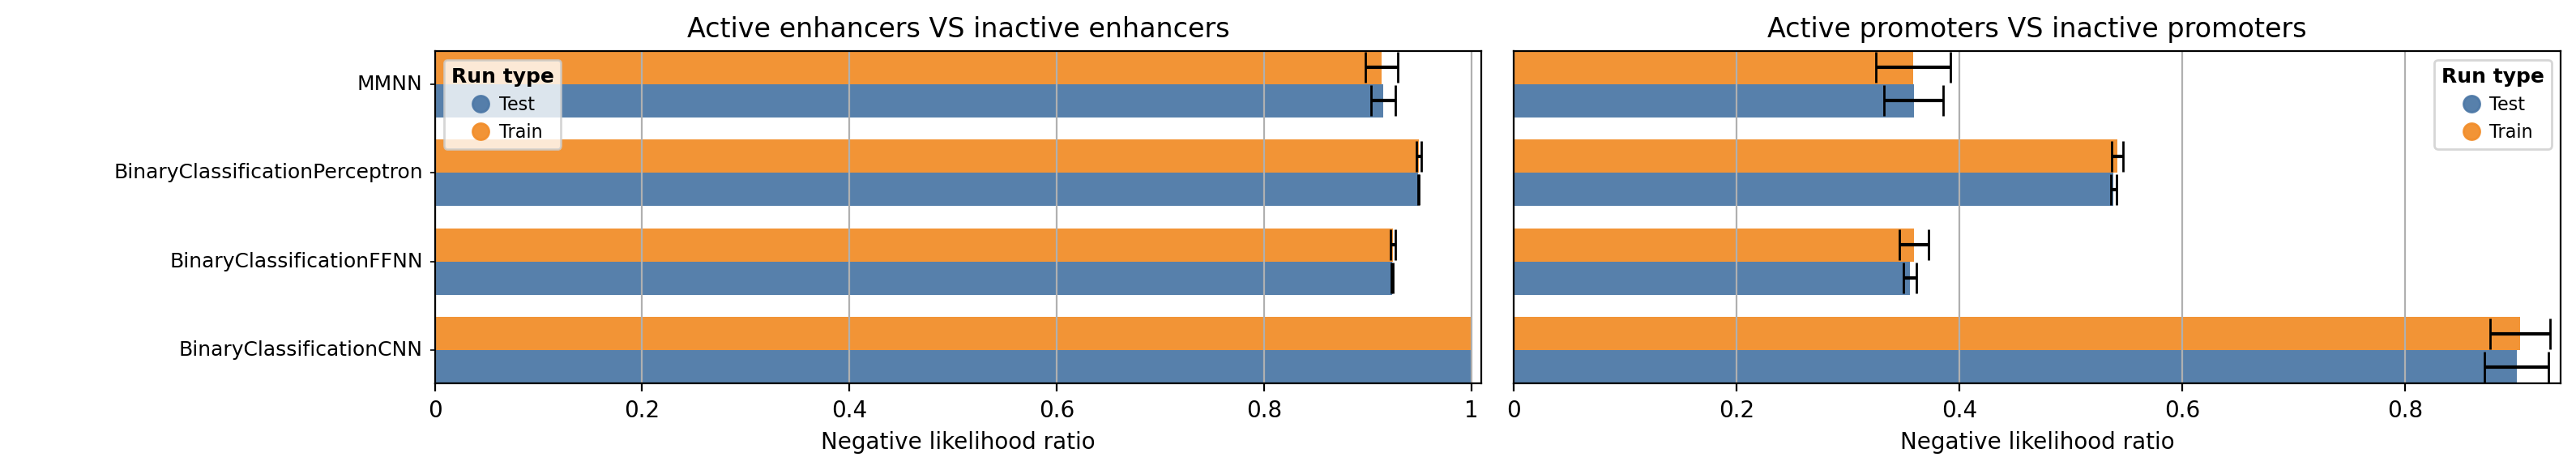

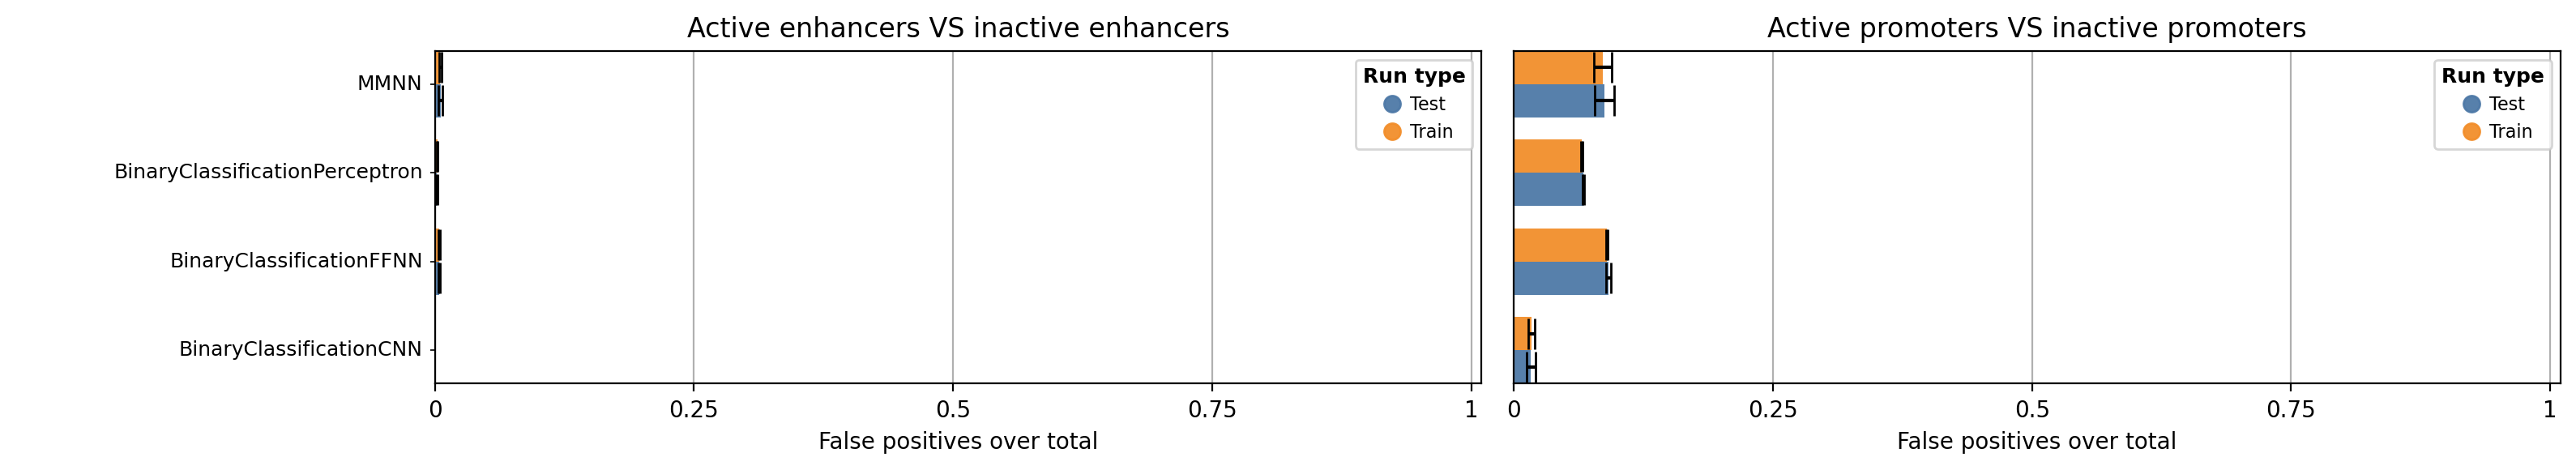

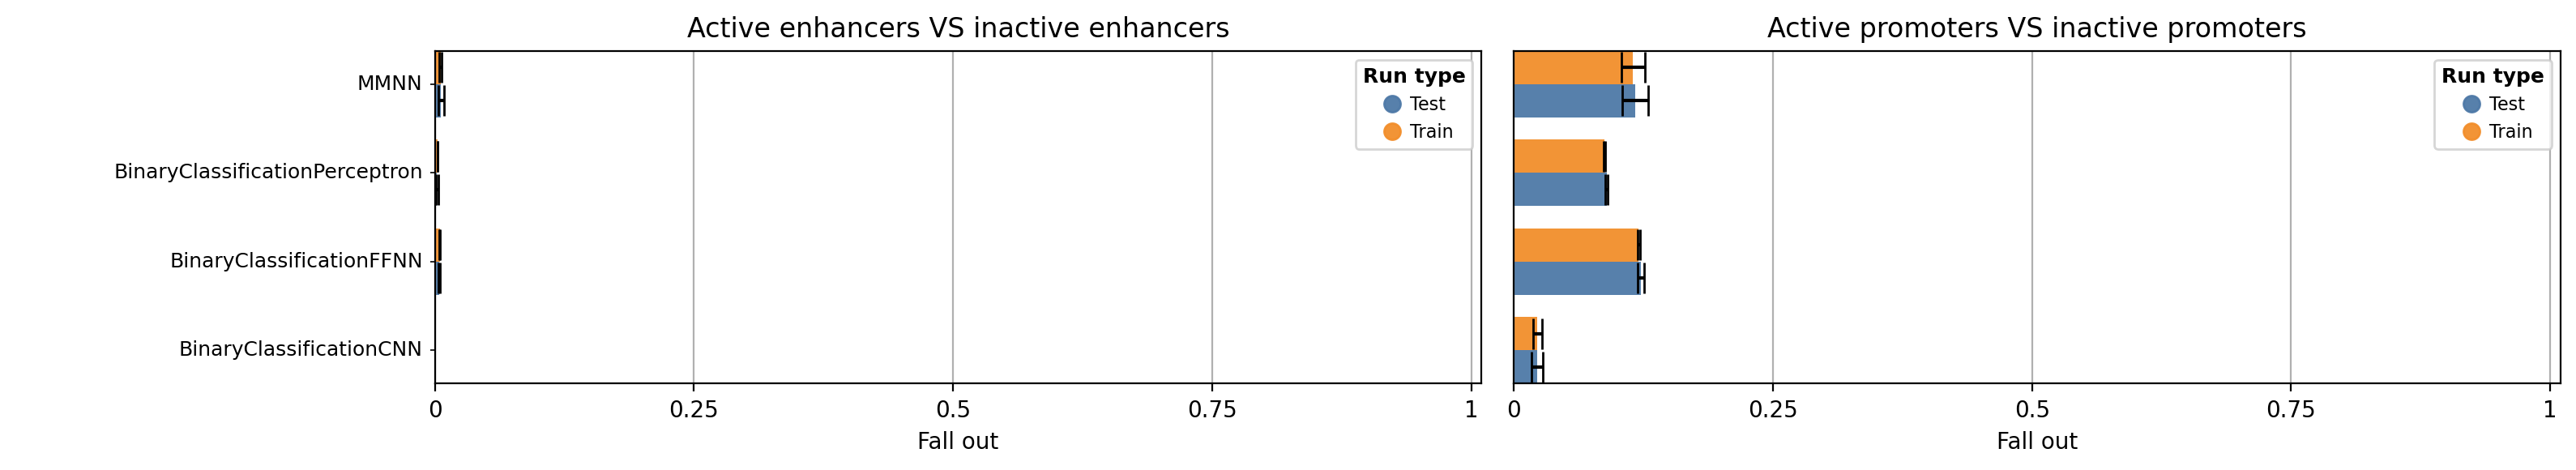

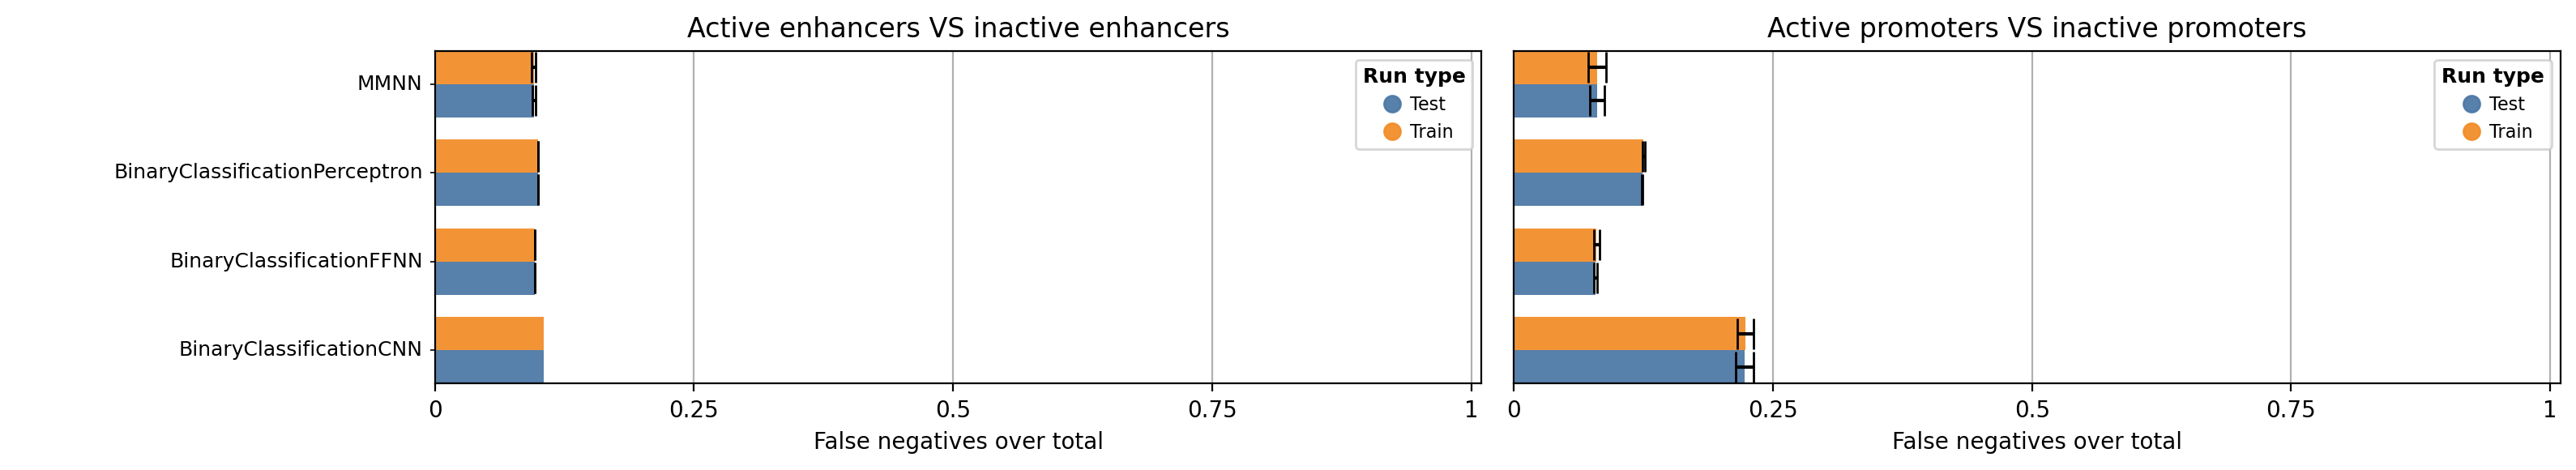

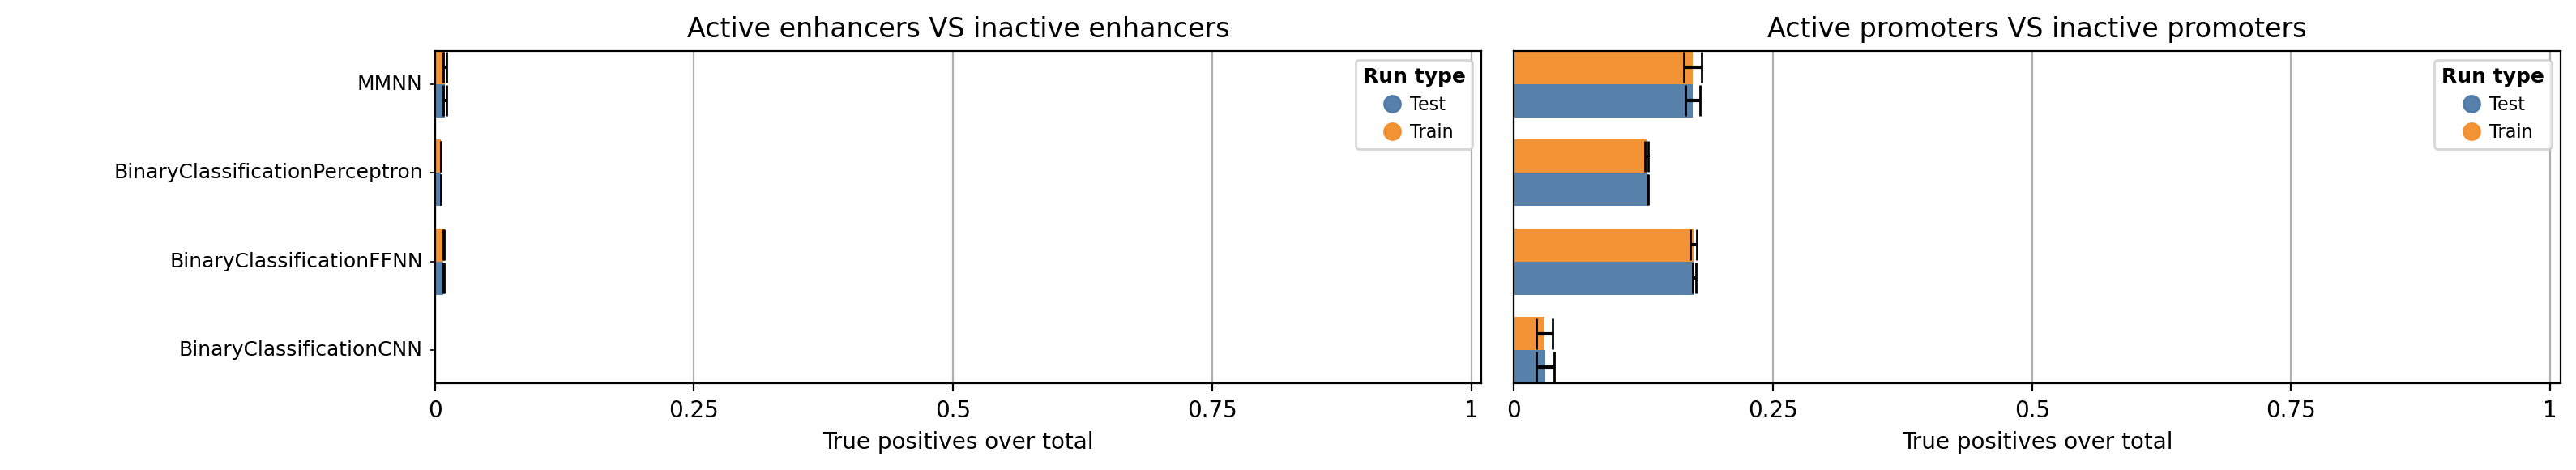

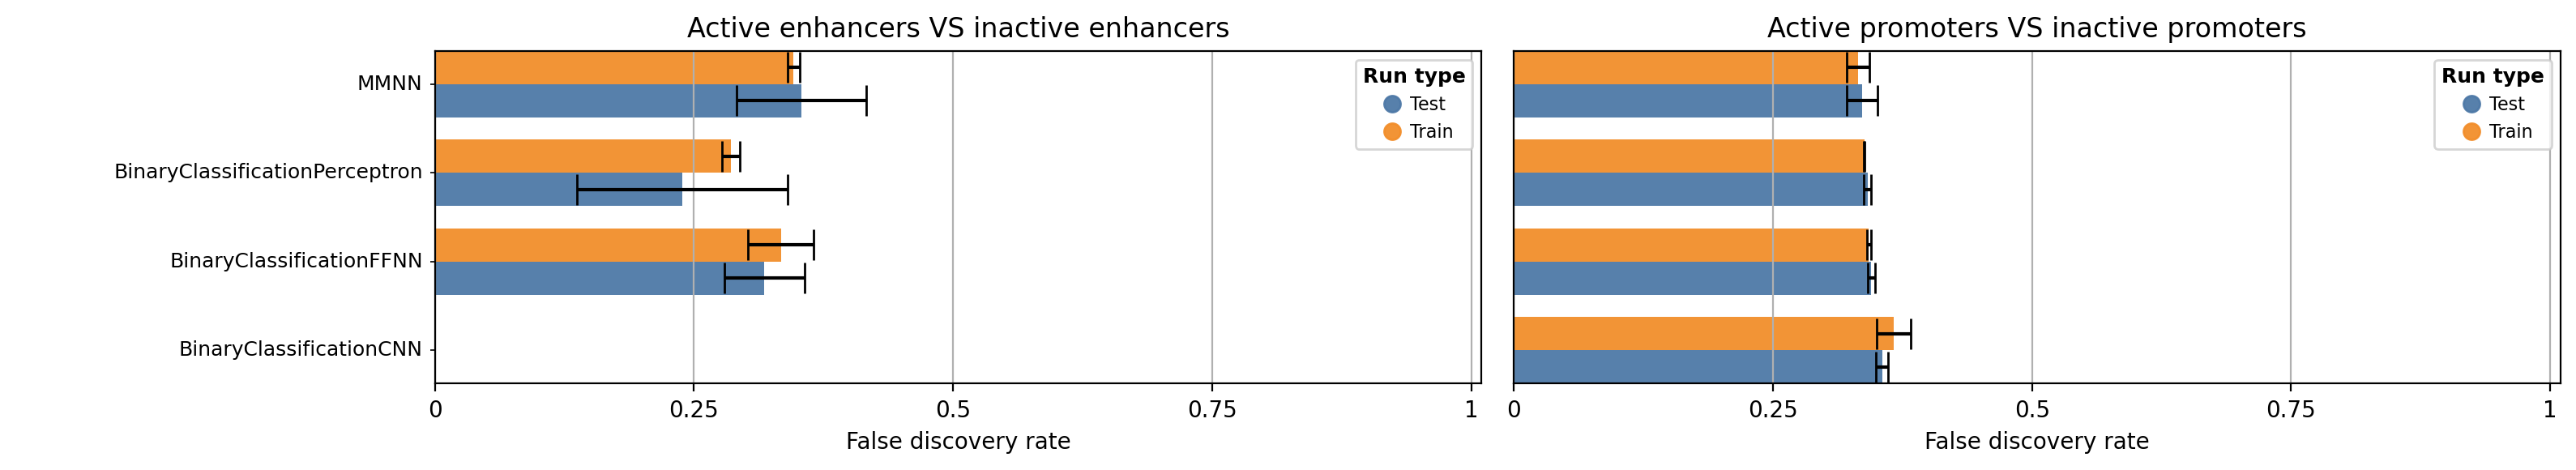

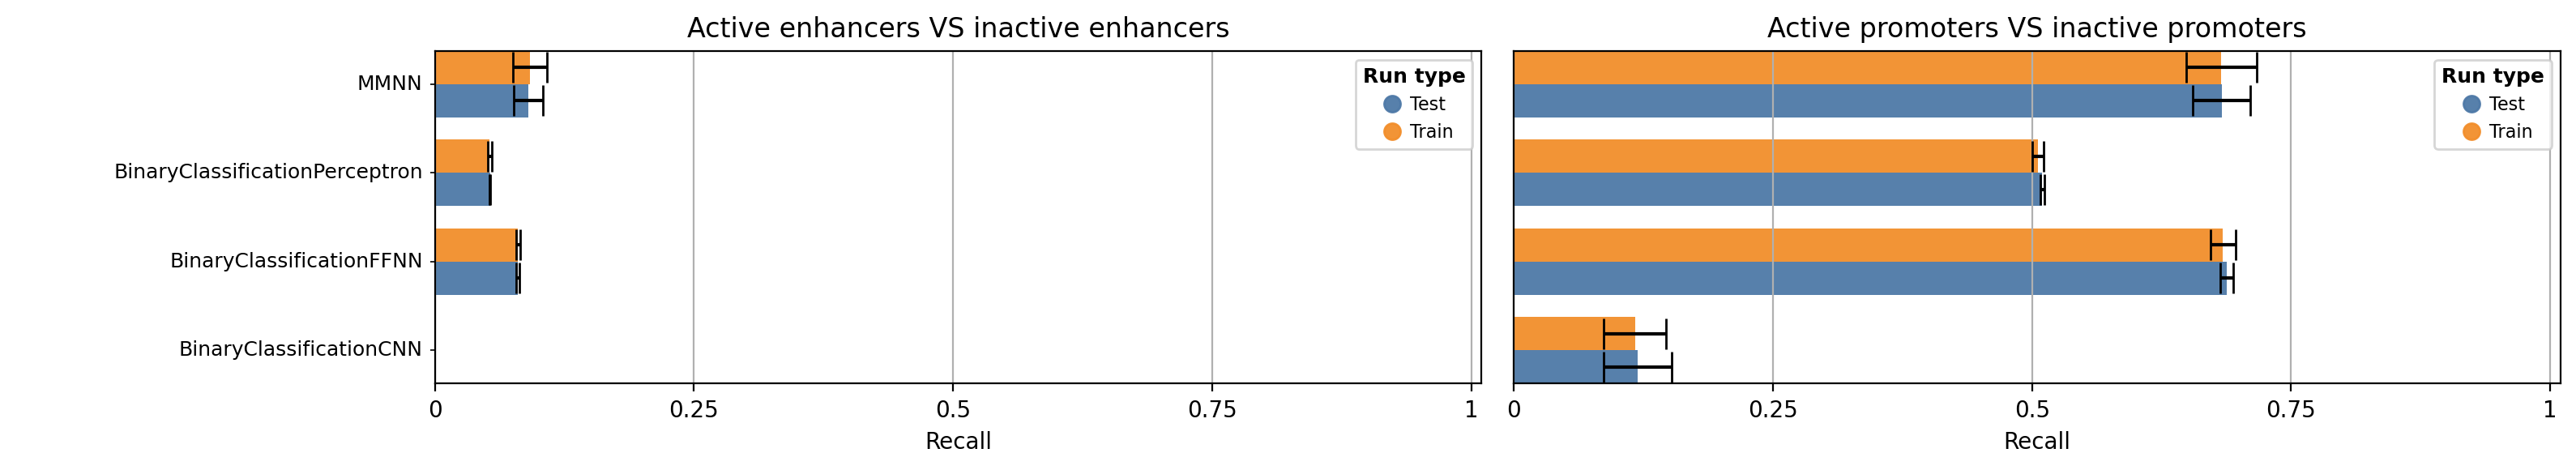

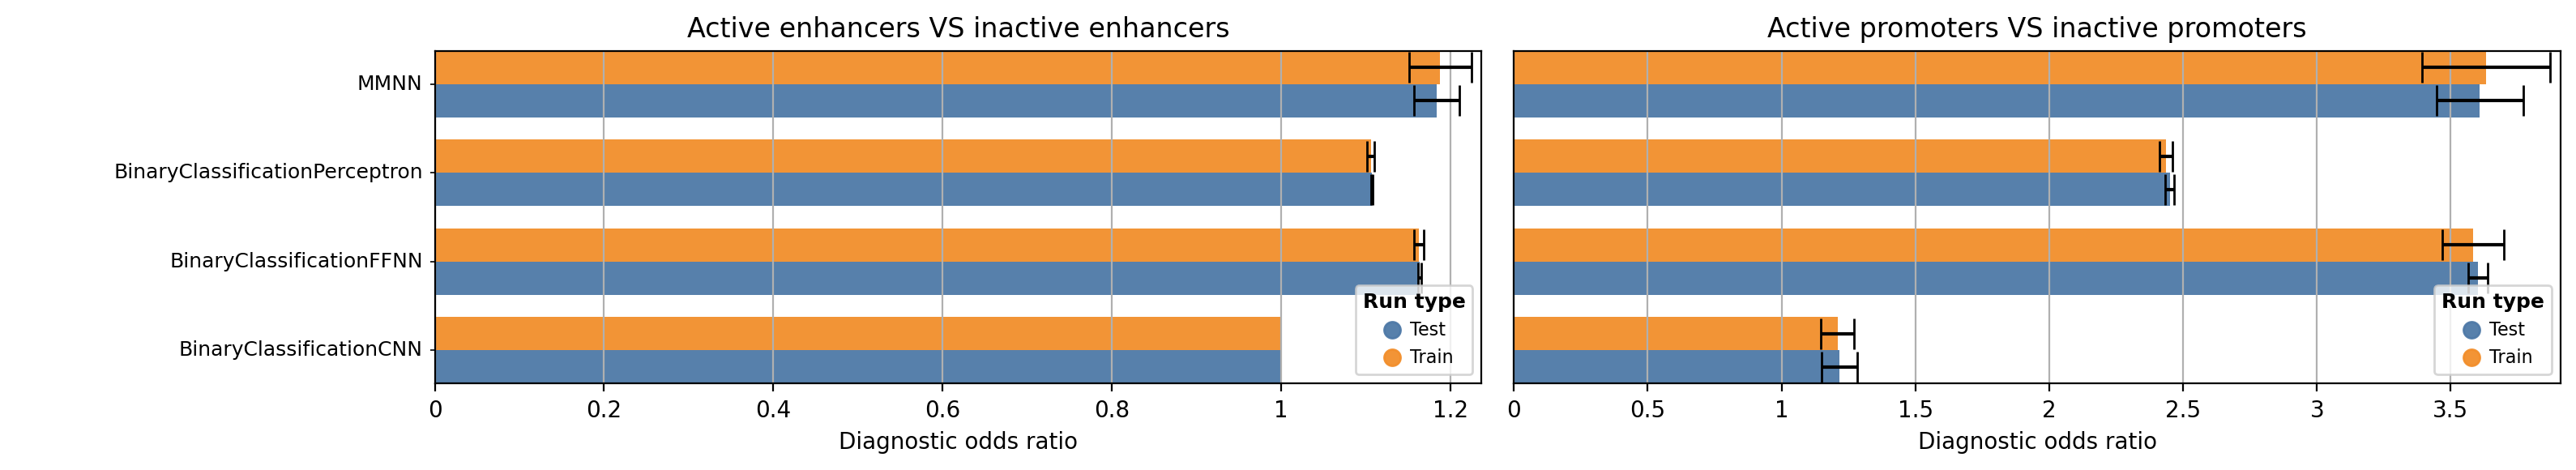

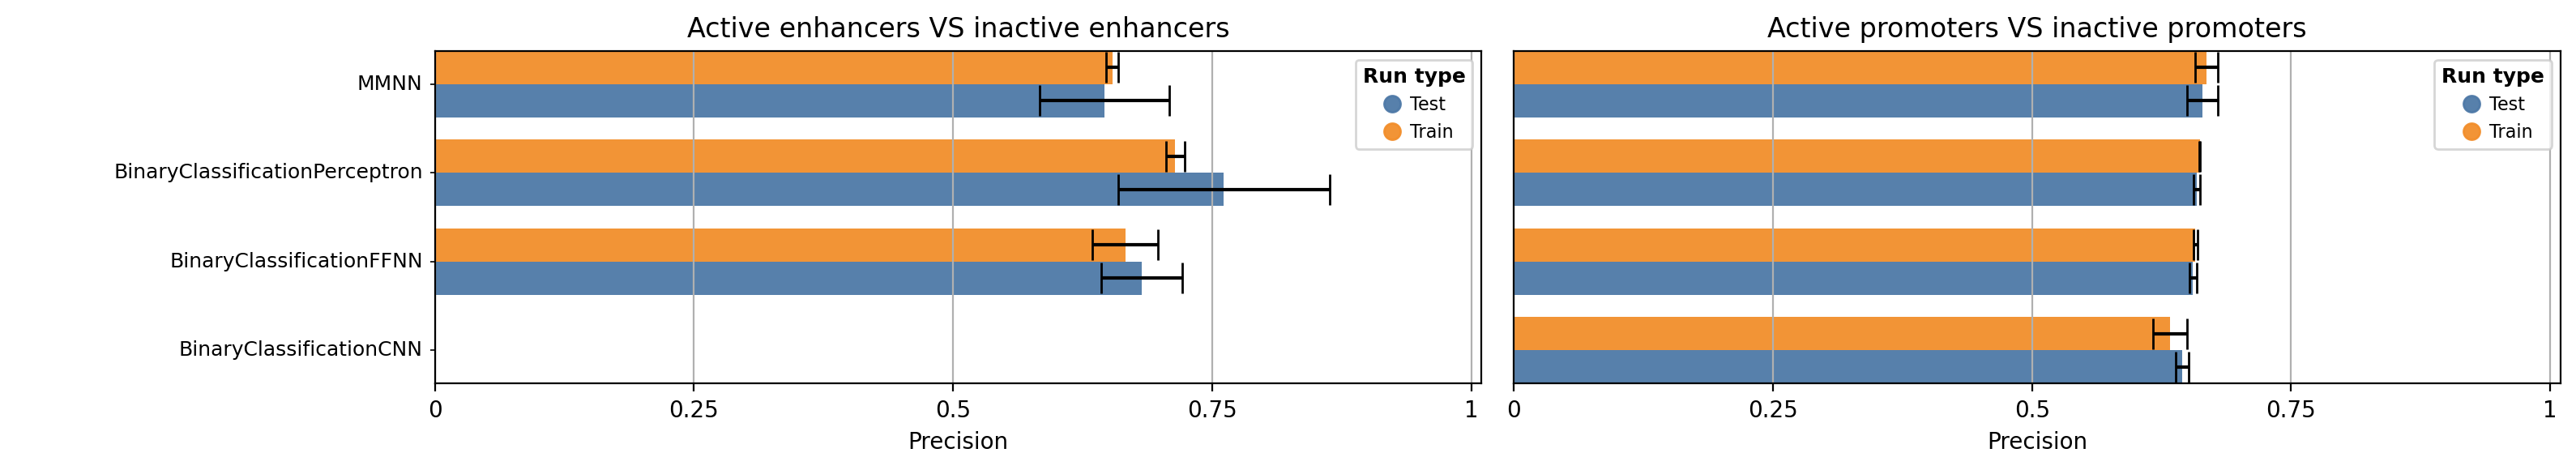

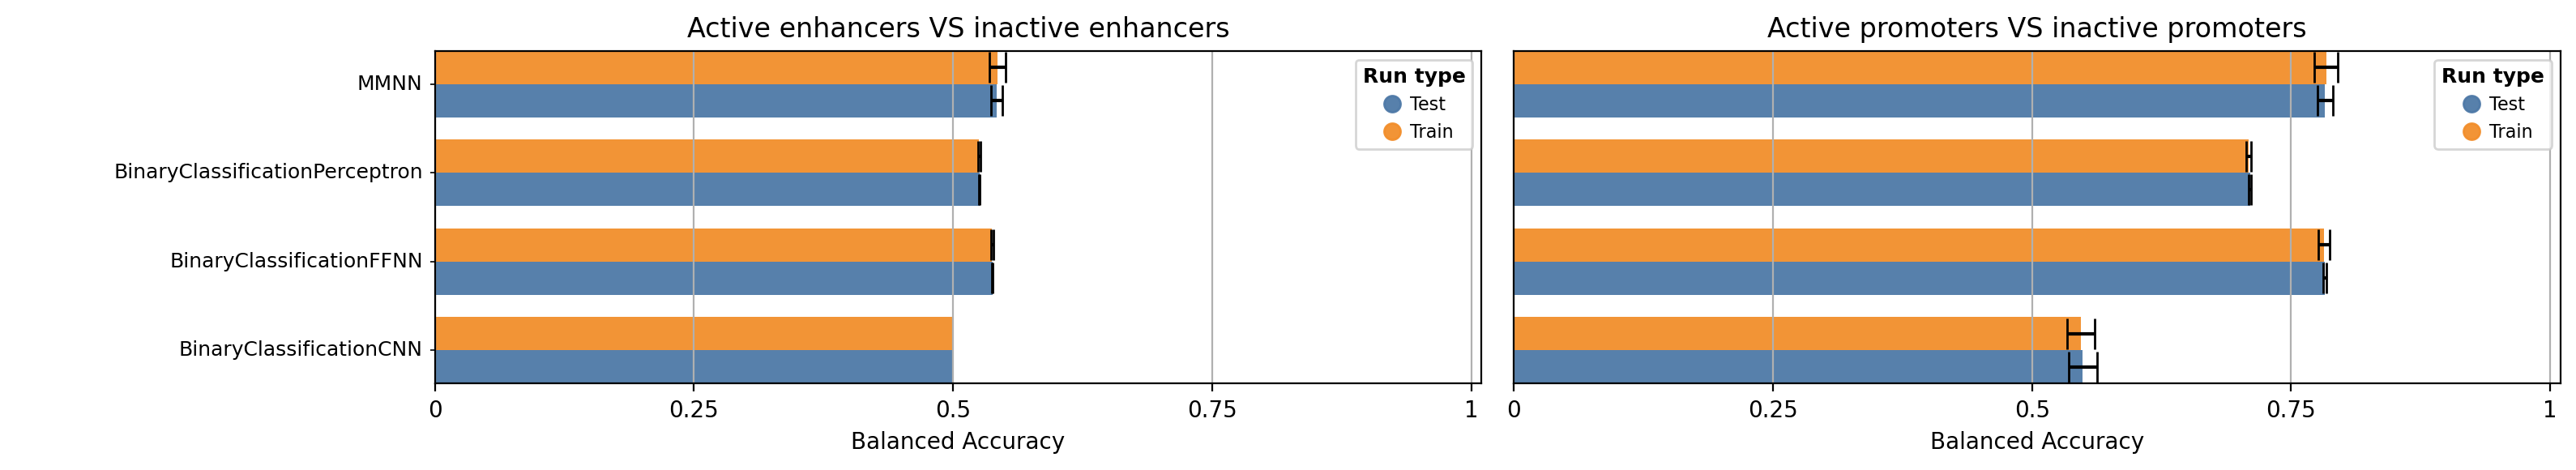

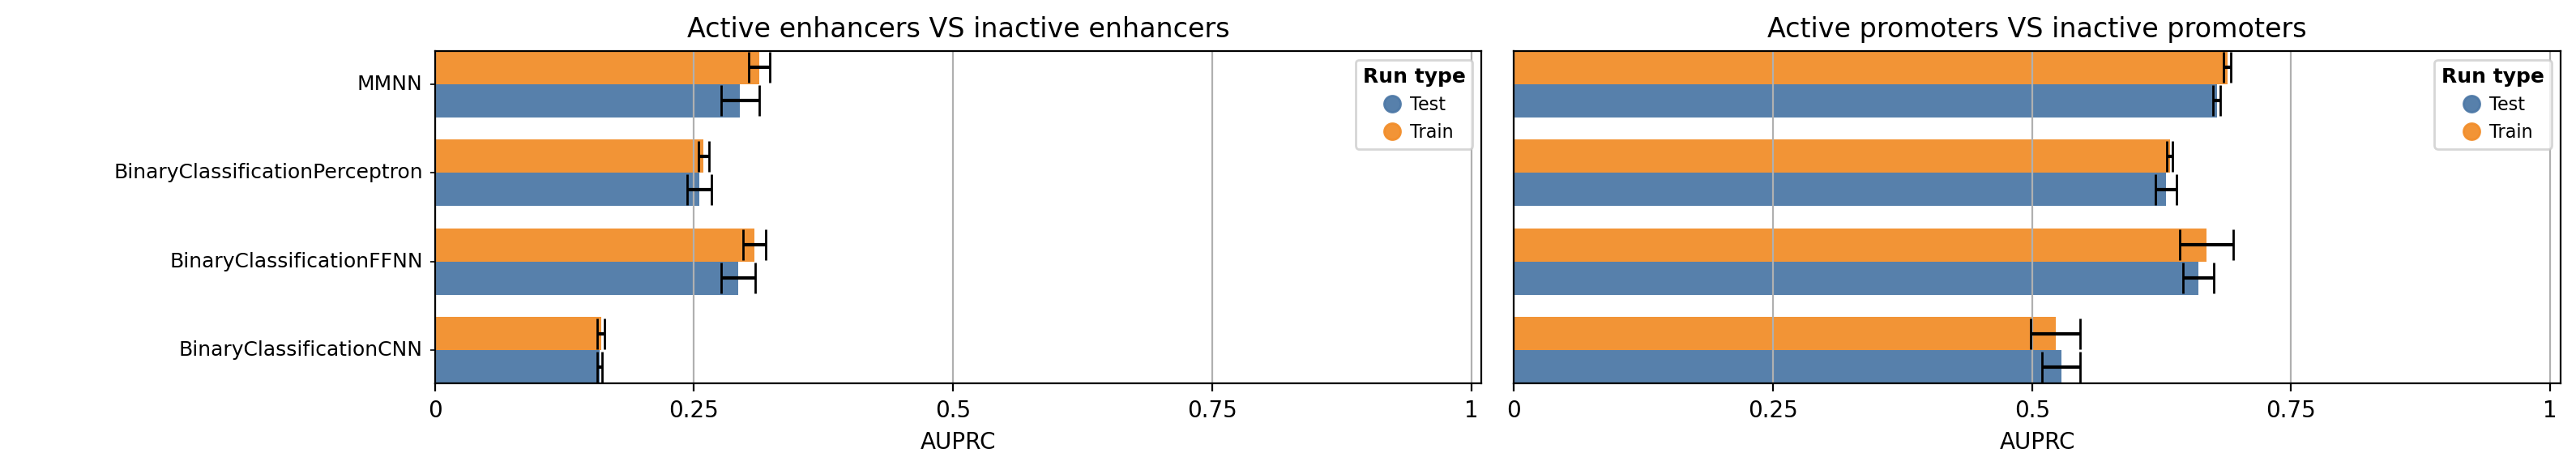

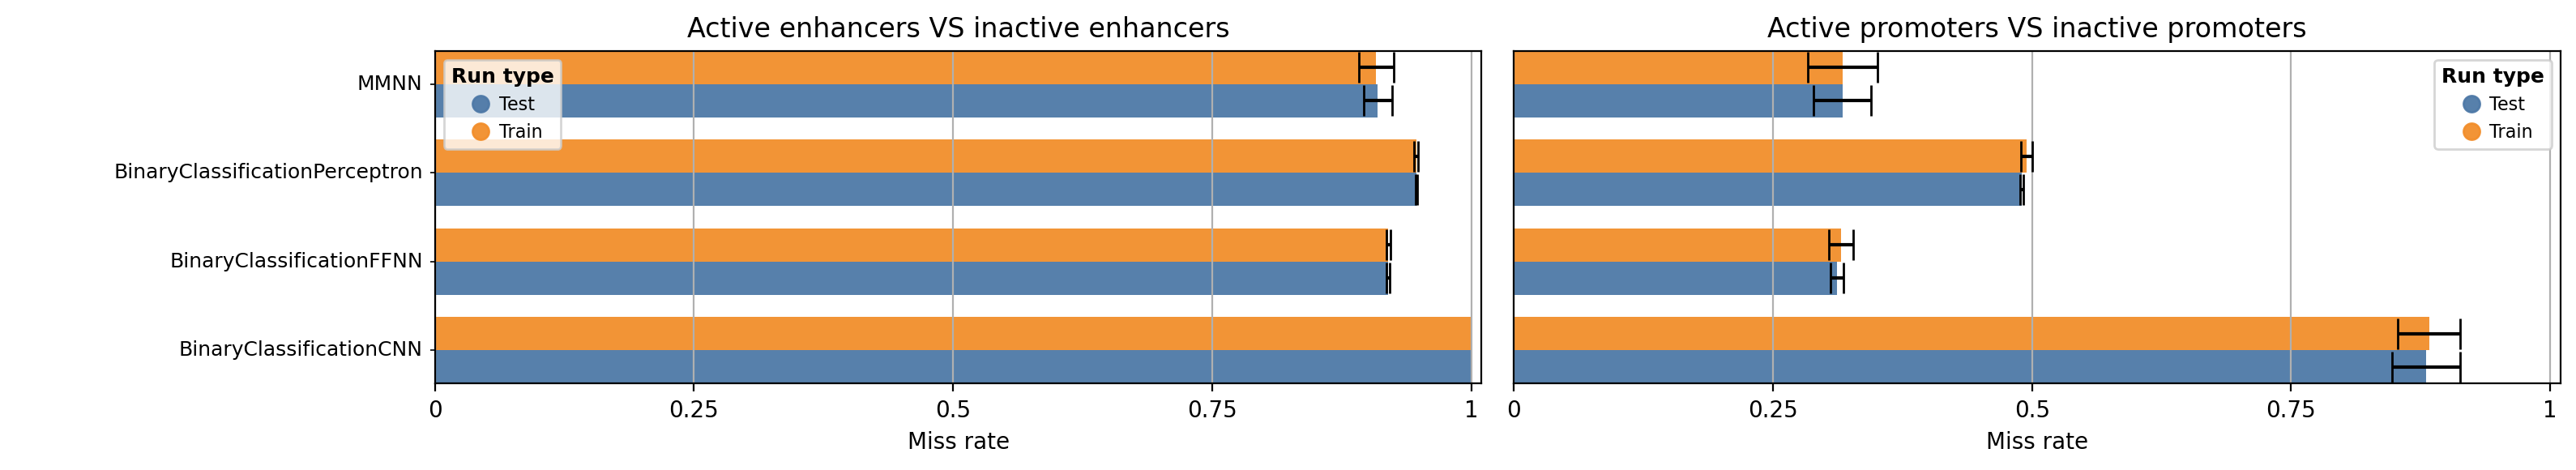

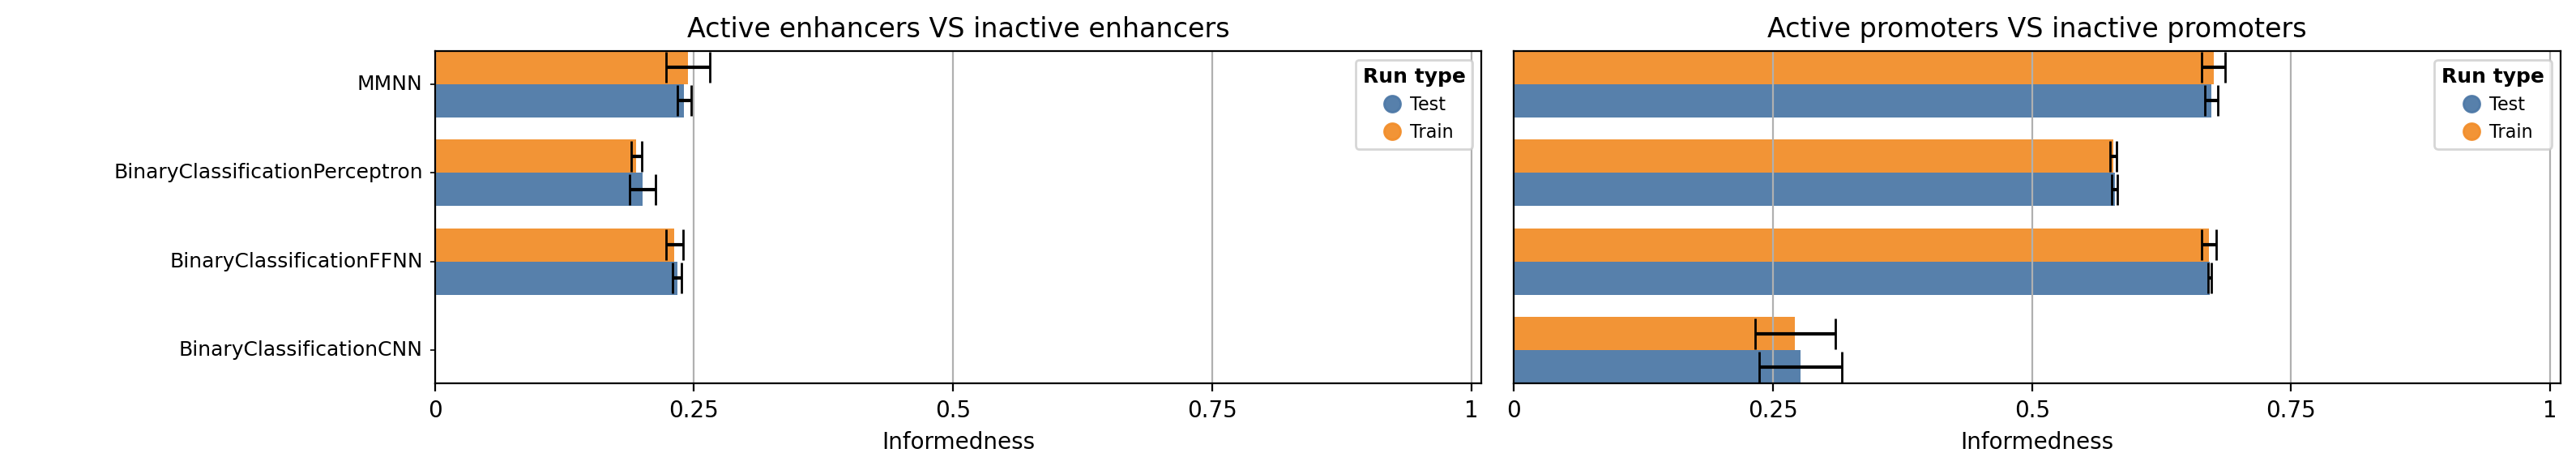

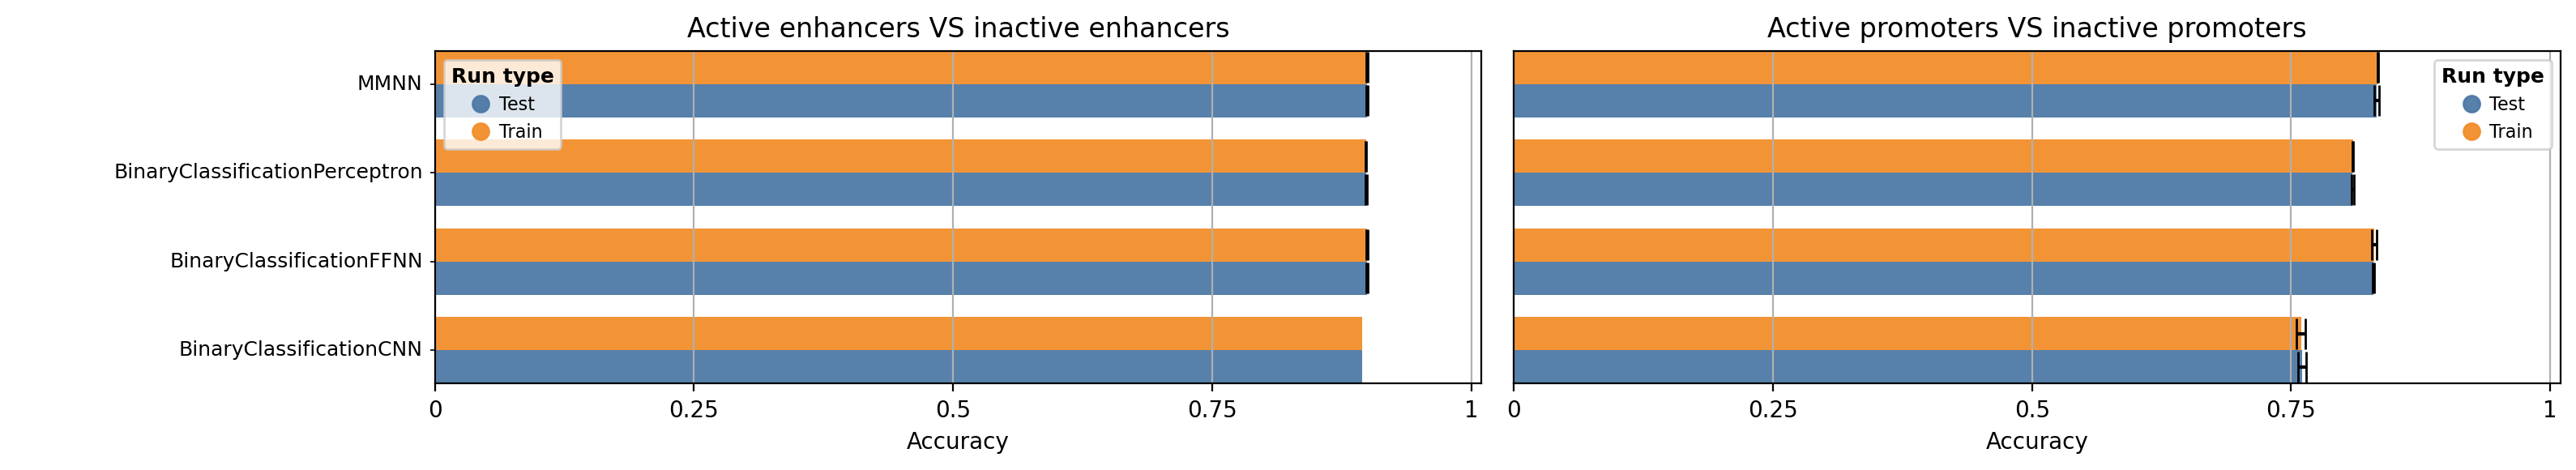

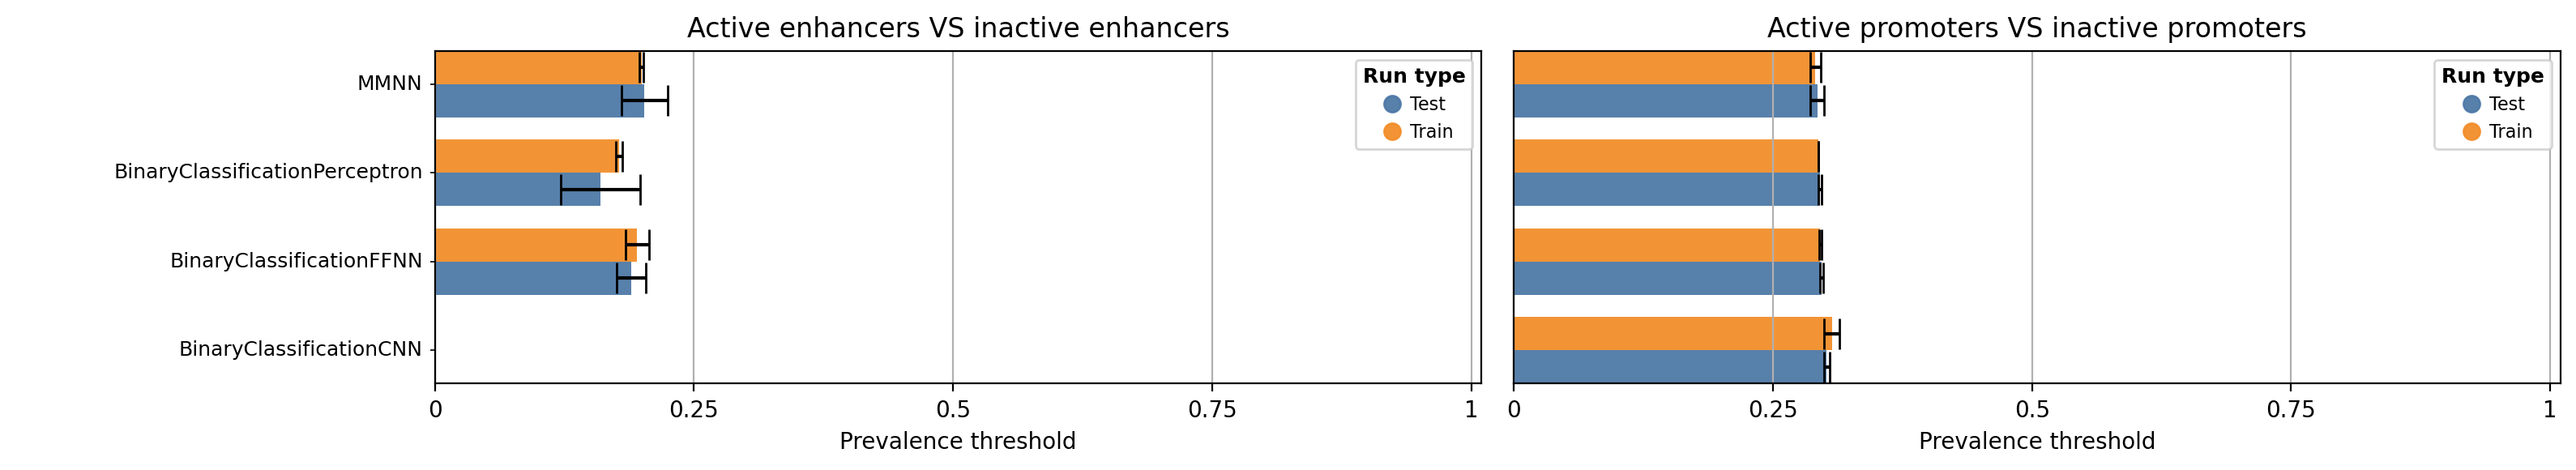

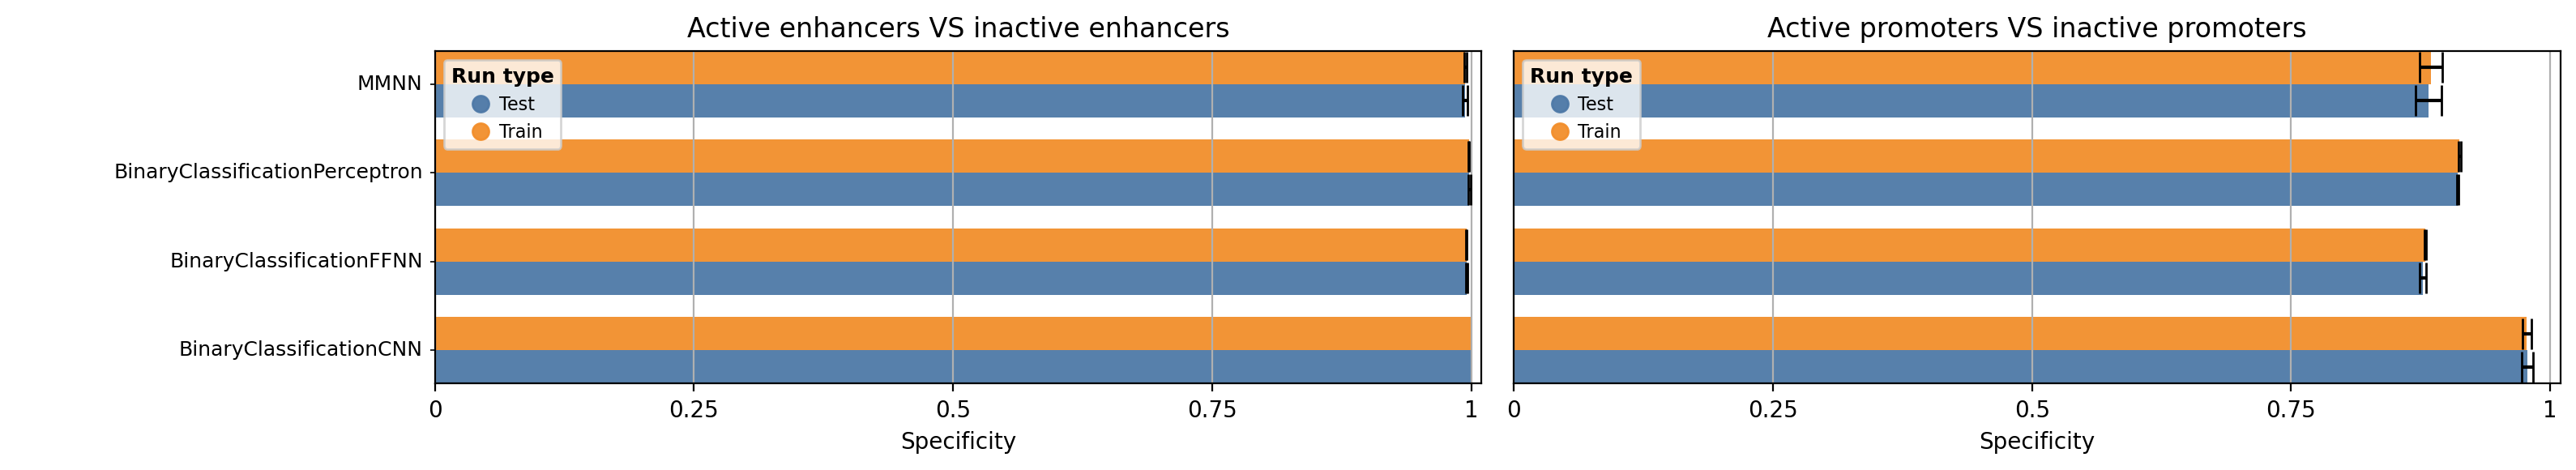

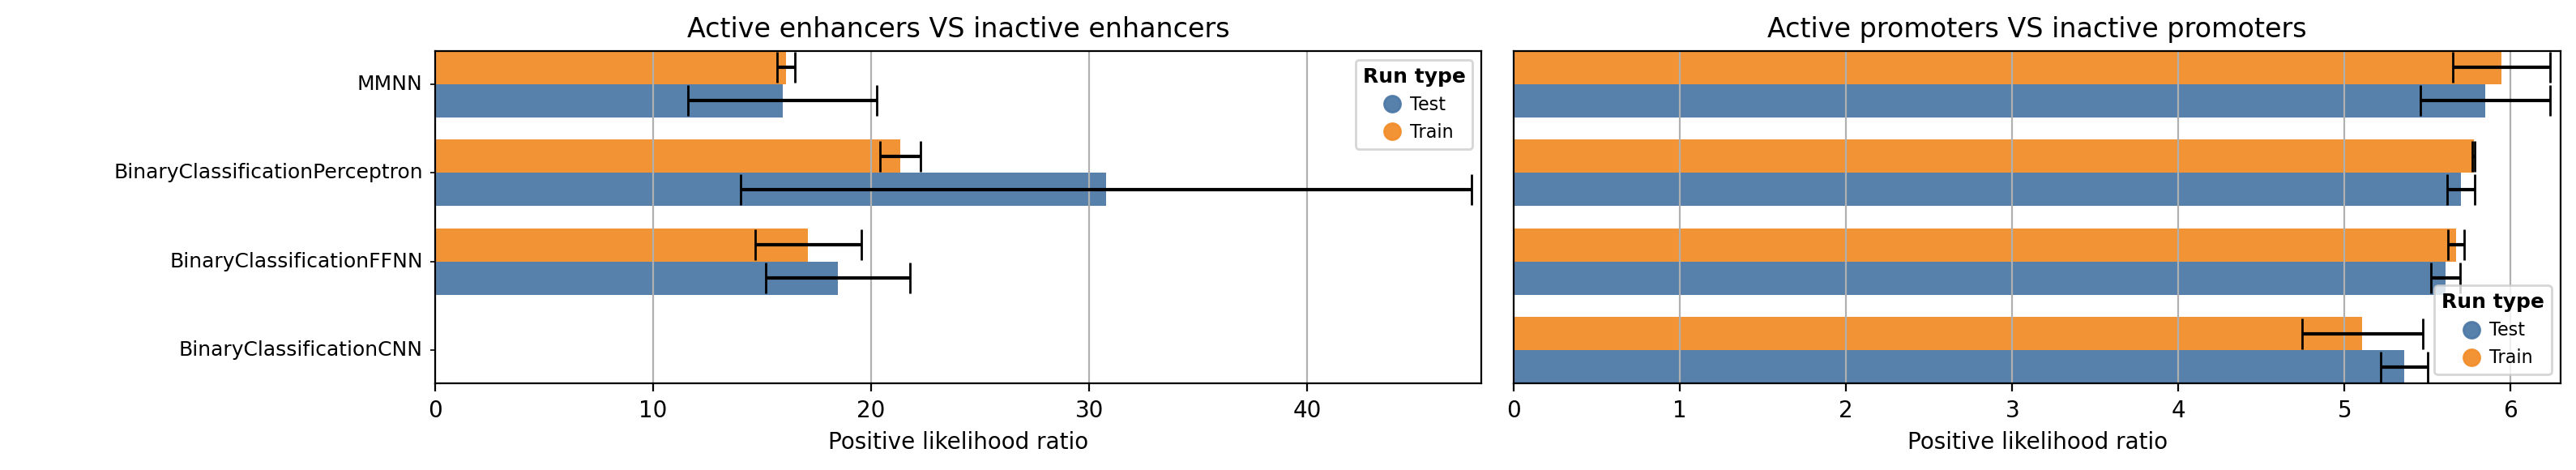

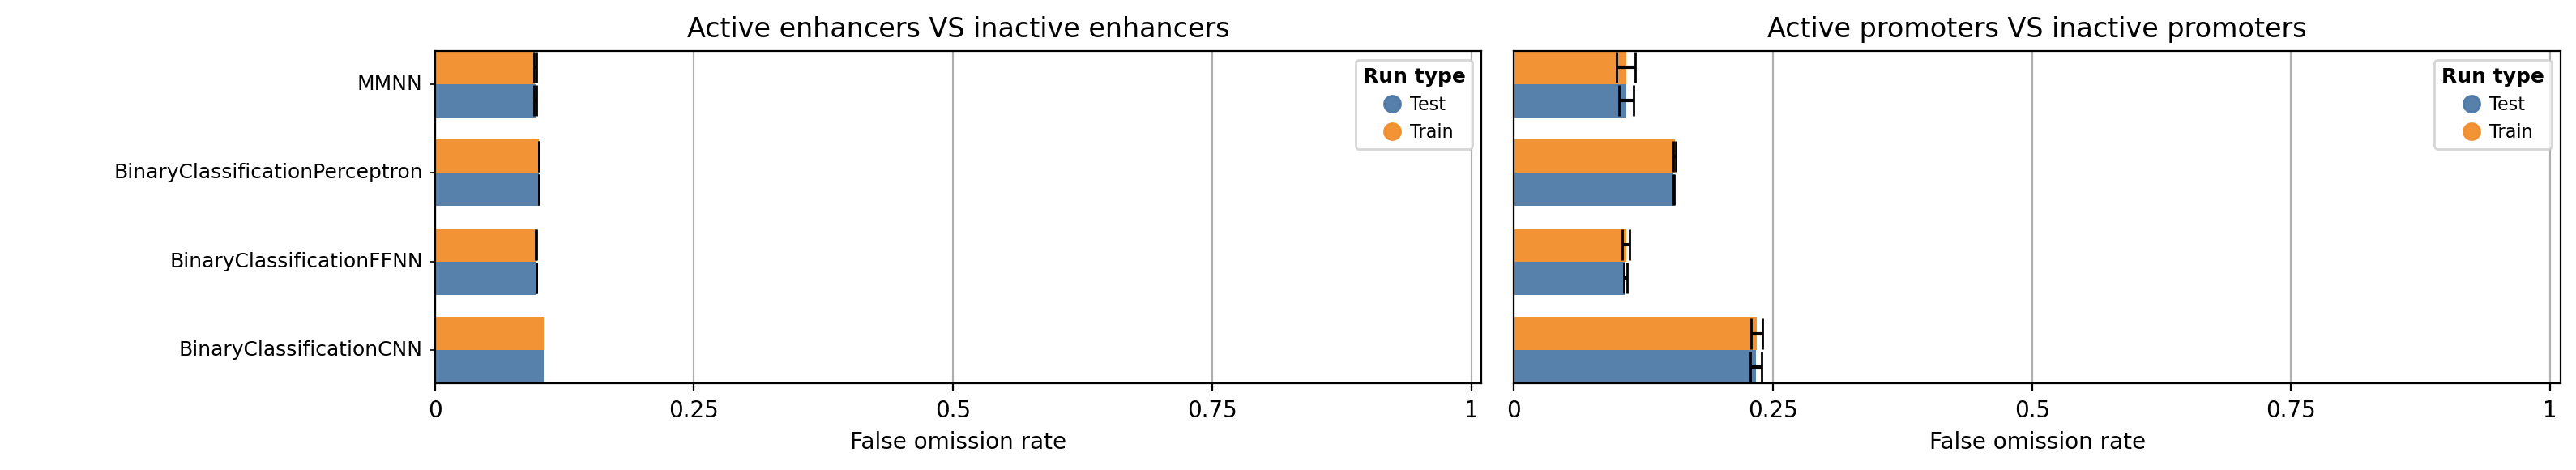

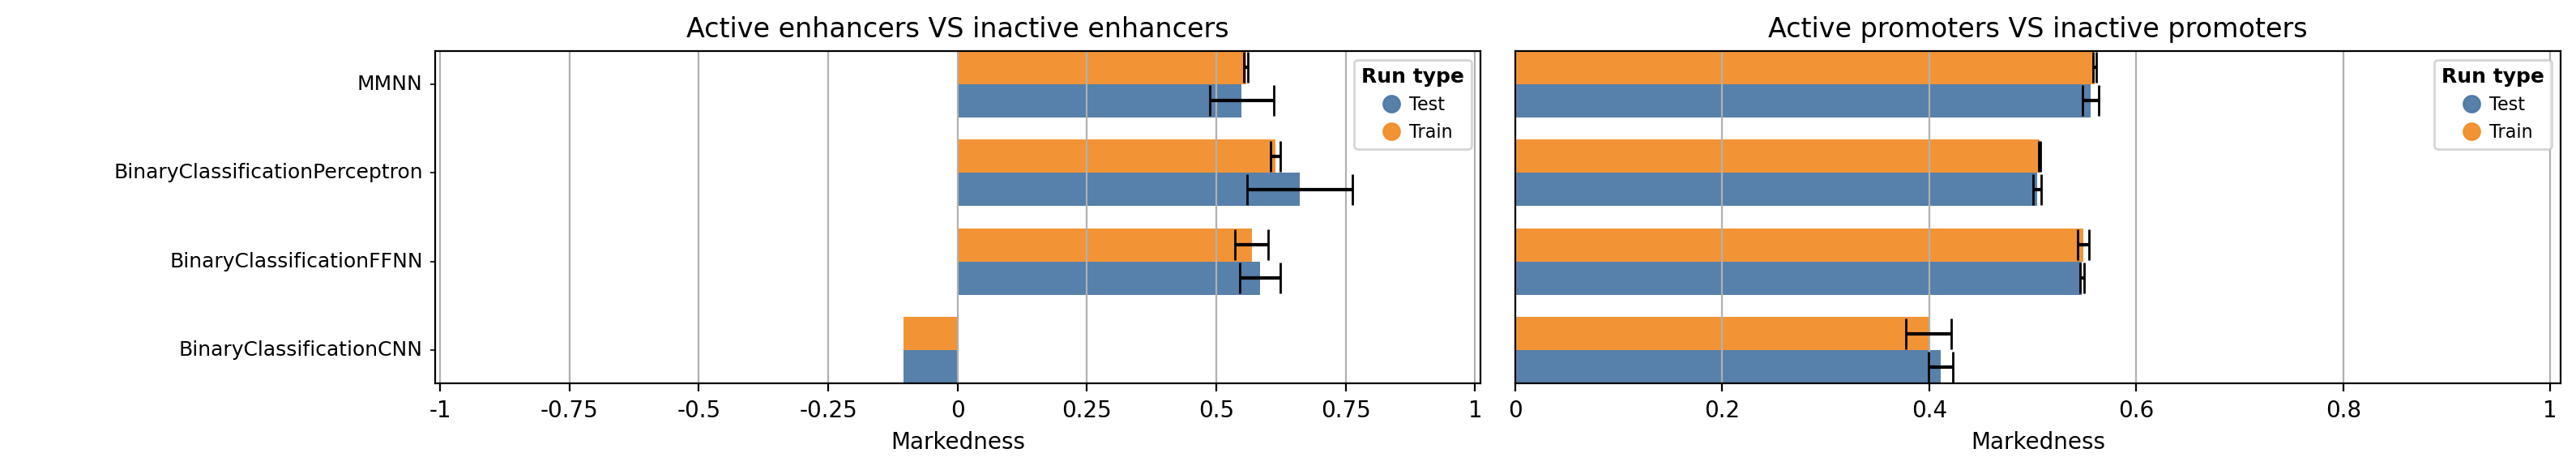

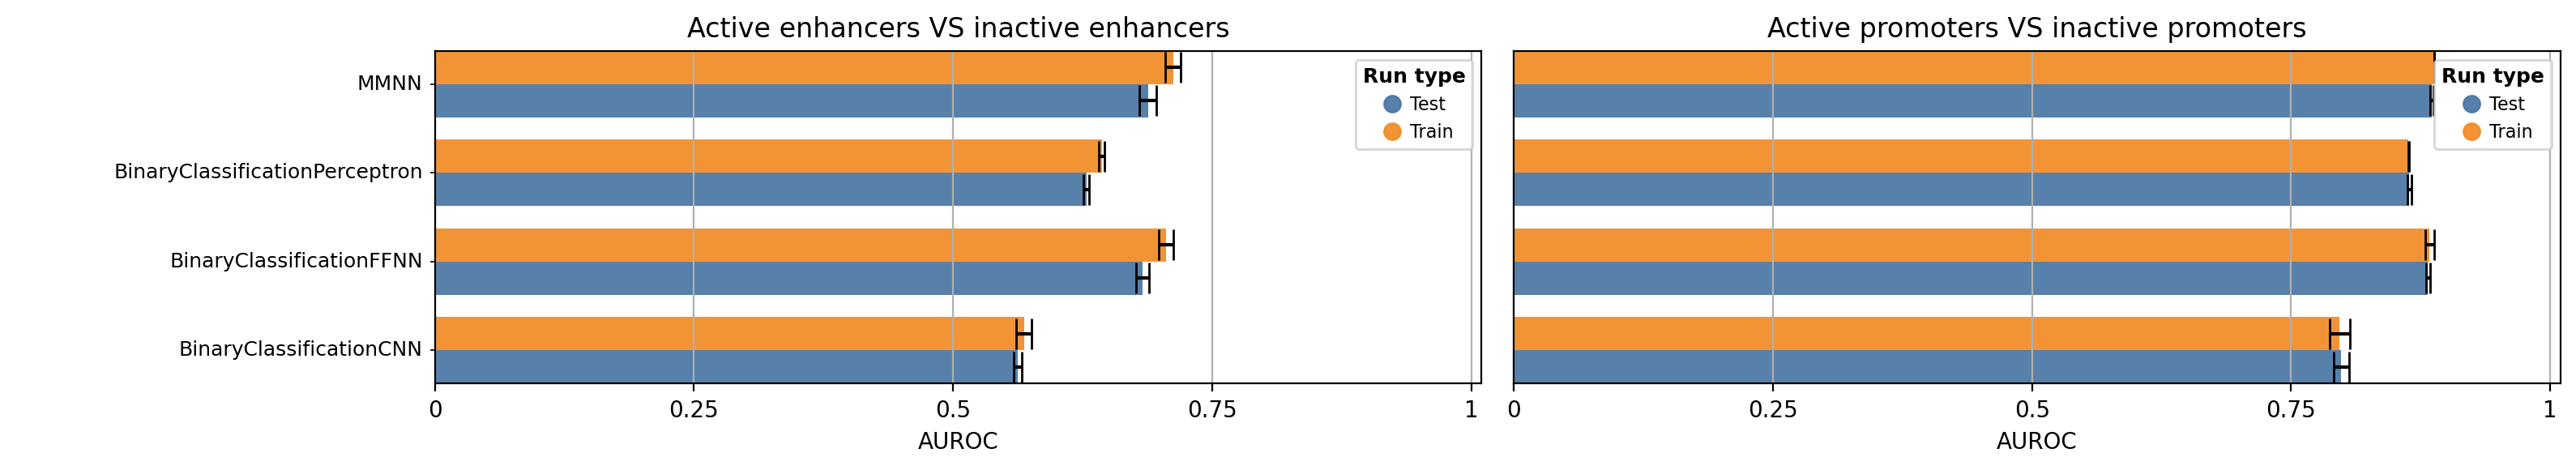

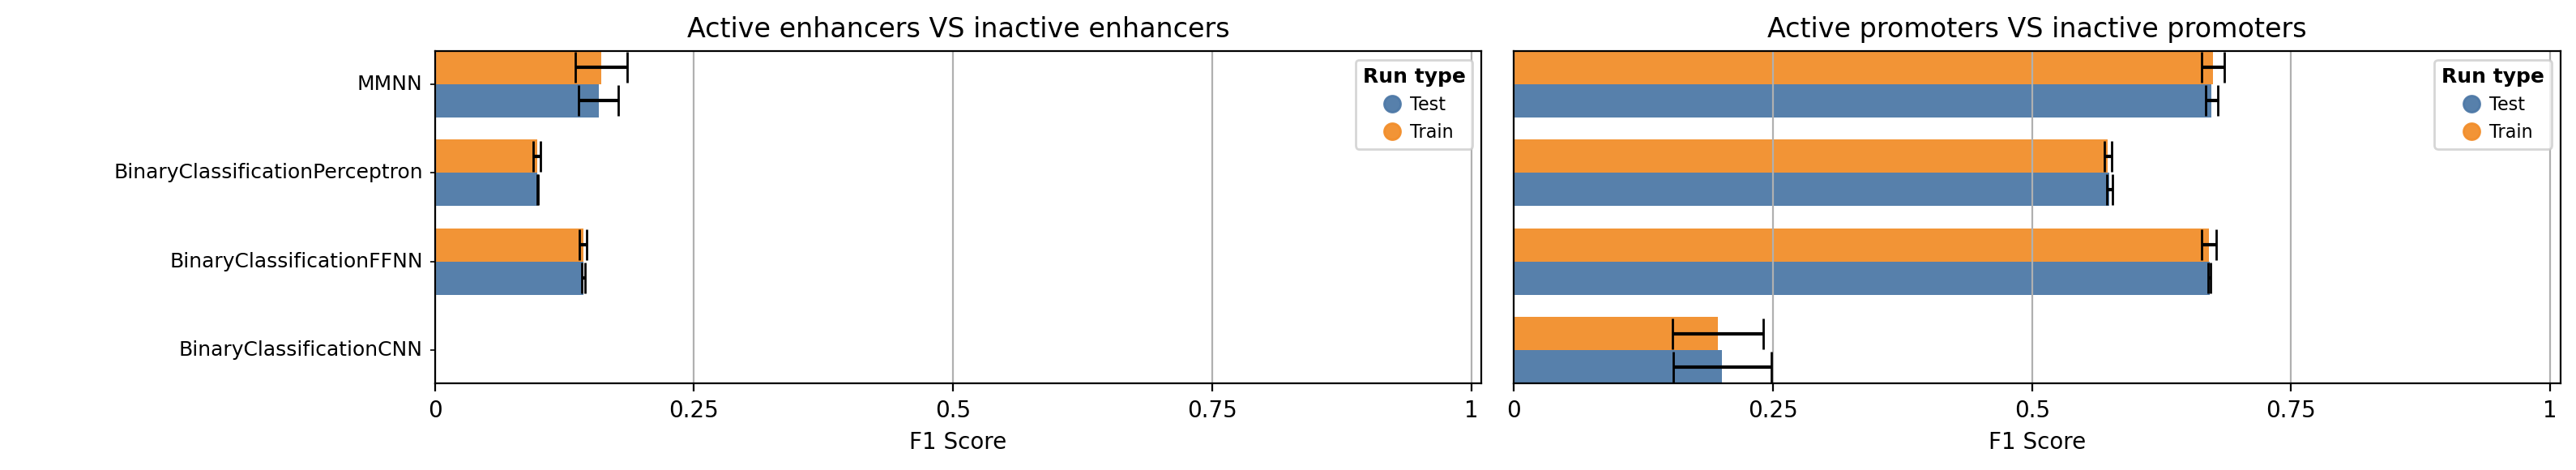

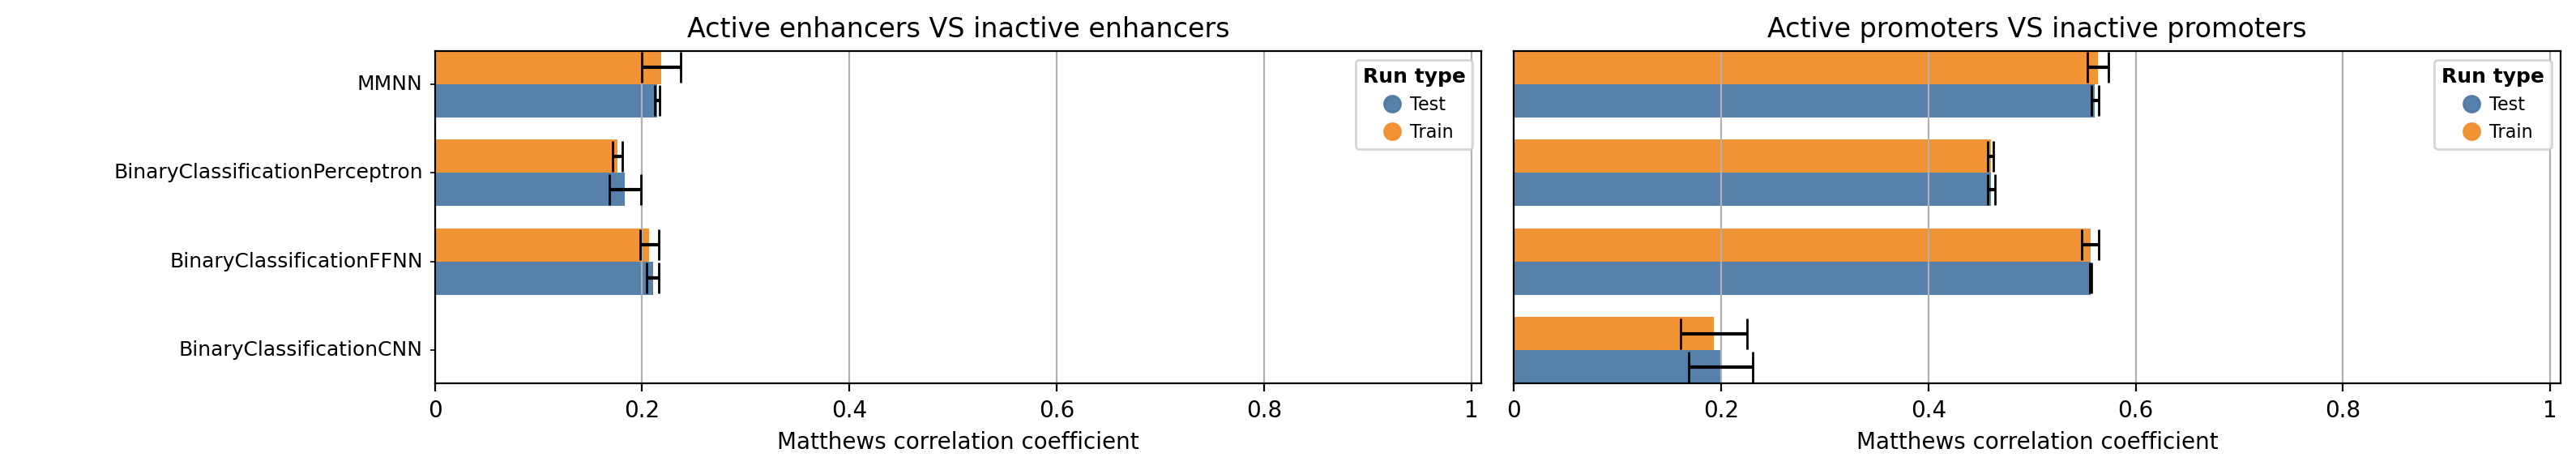

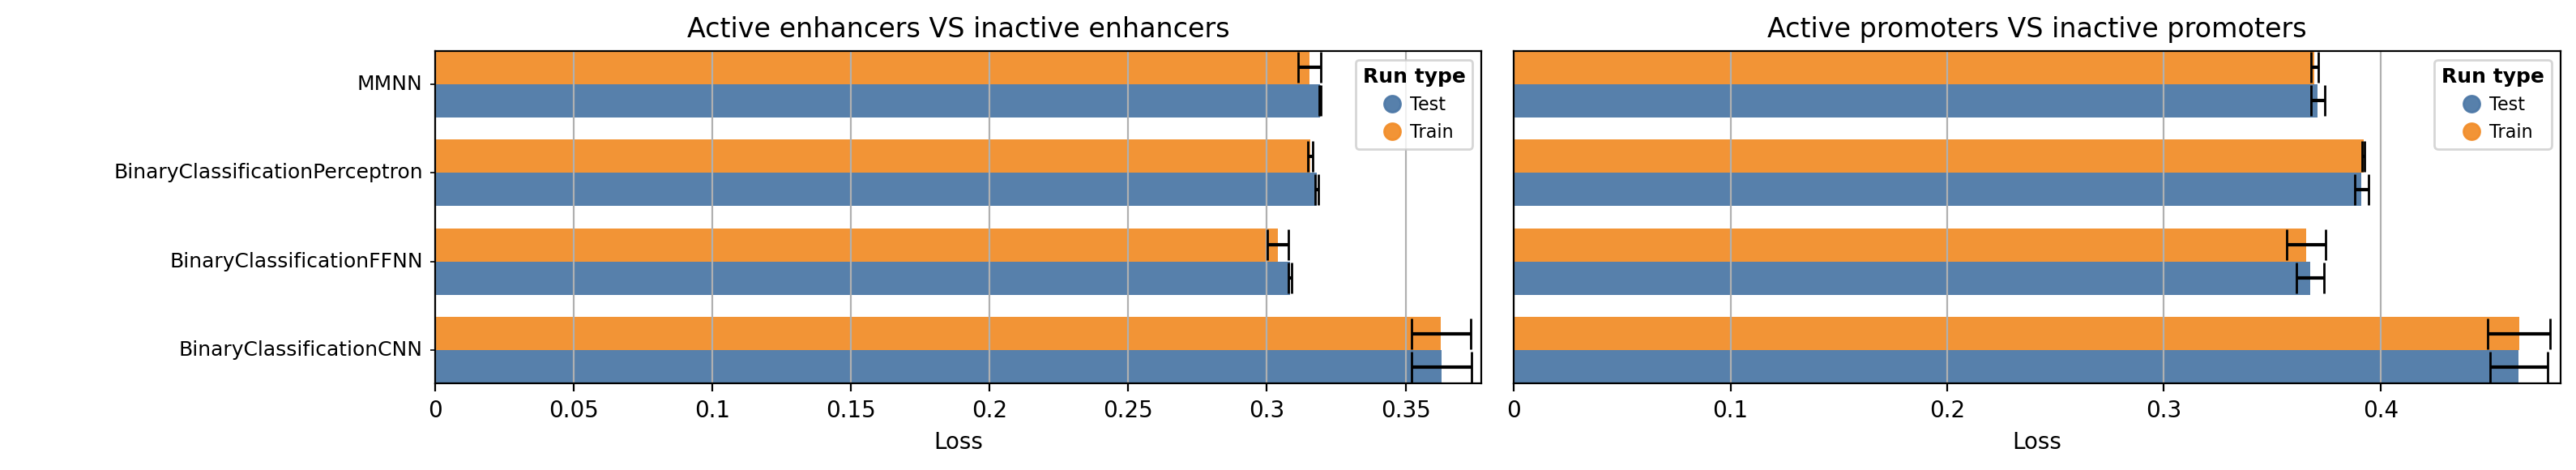

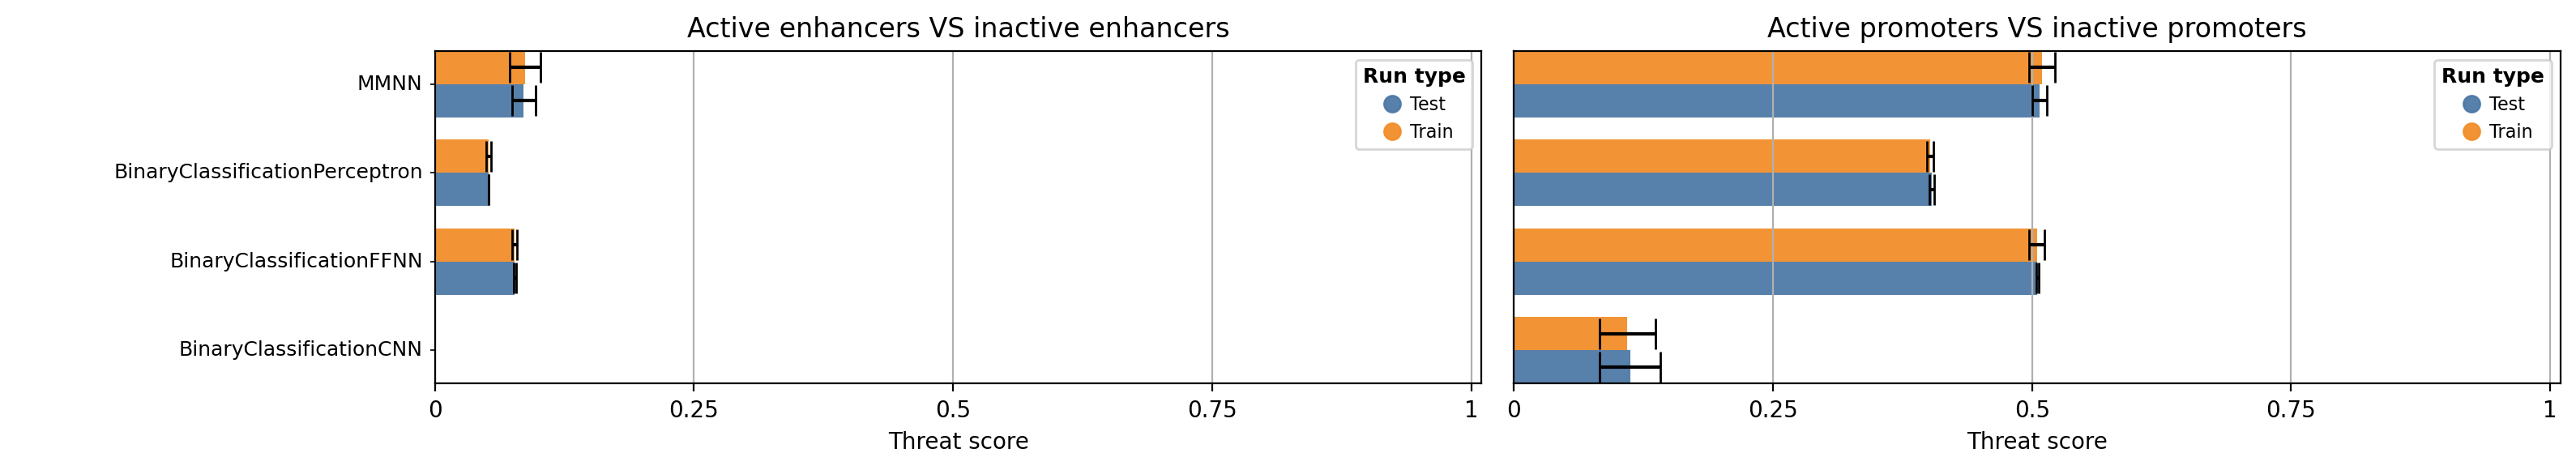

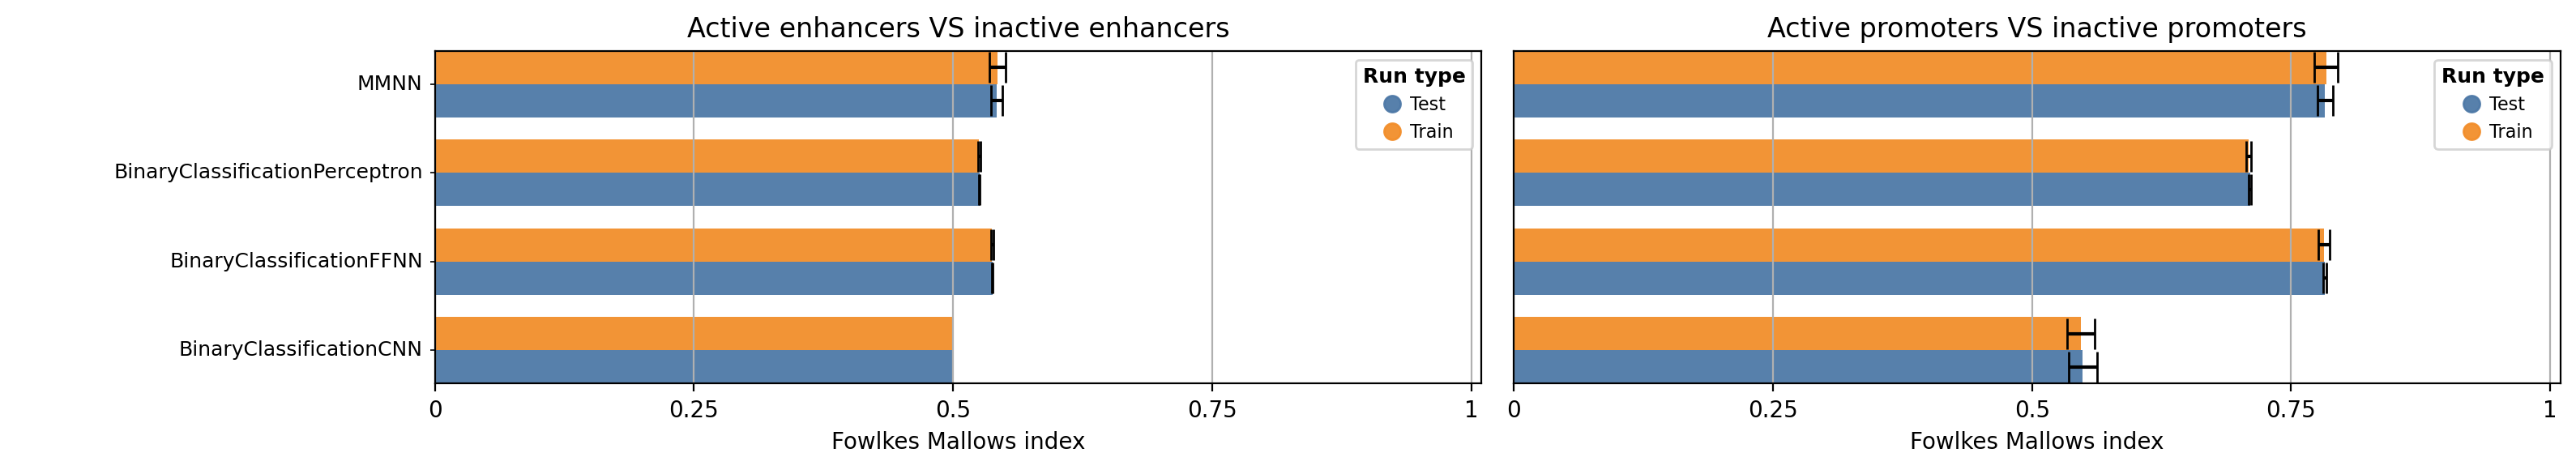

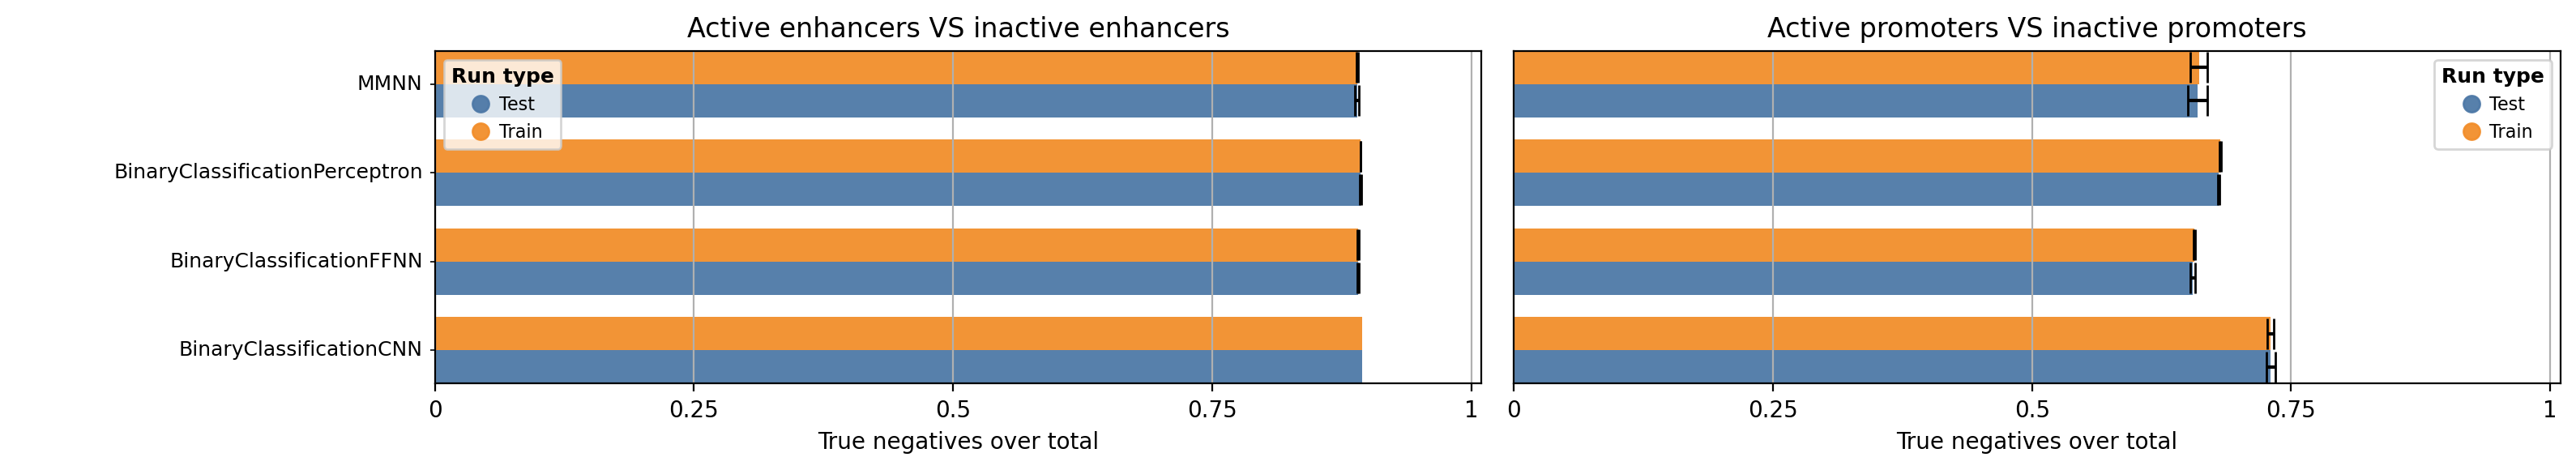

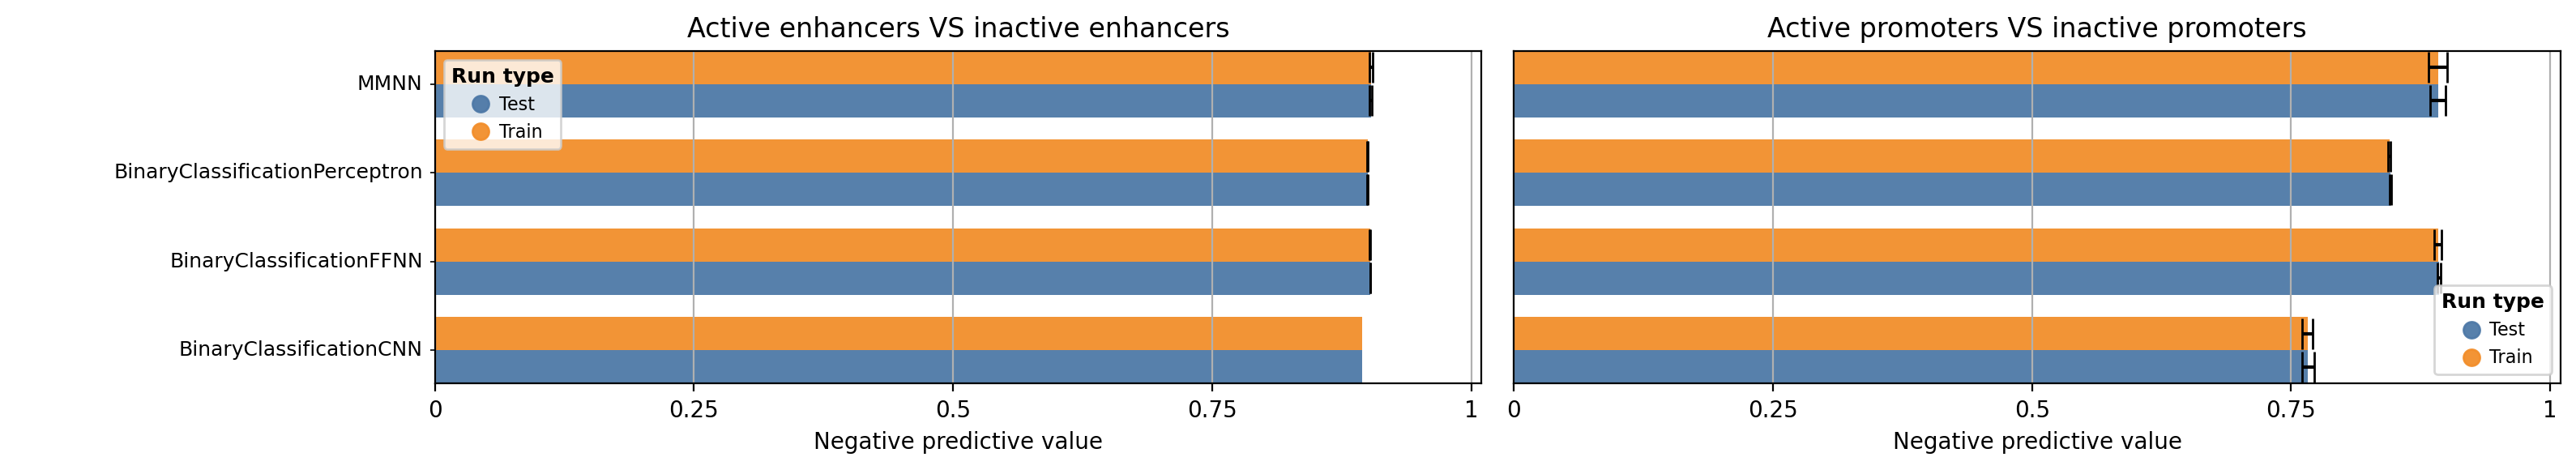

In [328]:
from barplots import barplots

barplots(
    all_binary_classification_performance.drop(columns=["holdout_number"]),
    groupby=["task", "model_name", "run_type"],
    orientation="horizontal",
    height=8,
    subplots=True
)

In [368]:
test = all_binary_classification_performance[all_binary_classification_performance['run_type']=='test']
test

loss  accuracy    recall  precision     AUROC     AUPRC  f1_score  \
1  0.318277  0.898080  0.053424   0.689320  0.630493  0.247081  0.099162   
1  0.308649  0.899028  0.081264   0.654545  0.678660  0.281211  0.144578   
1  0.370550  0.894999  0.000000   0.000000  0.565000  0.157521  0.000000   
1  0.319458  0.898554  0.100075   0.601810  0.681880  0.281865  0.171613   
1  0.317481  0.899423  0.052671   0.833333  0.626638  0.263256  0.099080   
1  0.307938  0.899897  0.079007   0.709459  0.687365  0.304066  0.142180   
1  0.355350  0.894999  0.000000   0.000000  0.559715  0.160779  0.000000   
1  0.318944  0.899660  0.080512   0.690323  0.693977  0.307352  0.144205   
1  0.393468  0.808330  0.508605   0.656537  0.862746  0.622204  0.573180   
1  0.362878  0.828953  0.692582   0.652685  0.883783  0.670874  0.672041   
1  0.473024  0.757671  0.096538   0.640420  0.792906  0.515260  0.167784   
1  0.373275  0.830555  0.702671   0.653662  0.884820  0.675725  0.677281   
1  0.389000  0.810032  0.511177   0.661208  0.865537  0.636302  0.576593   
1  0.372108  0.829904  0.683482   0.657719  0.880516  0.650104  0.670353   
1  0.454442  0.763578  0.143027   0.649013  0.803579  0.540751  0.234398   
1  0.368802  0.833859  0.663304   0.674648  0.886570  0.680862  0.668928   

   balanced_accuracy  specificity  miss_rate  ...  fowlkes_mallows_index  \
1           0.525299     0.997175   0.946576  ...               0.525299   
1           0.538116     0.994968   0.918736  ...               0.538116   
1           0.500000     1.000000   1.000000  ...               0.500000   
1           0.546153     0.992232   0.899925  ...               0.546153   
1           0.525718     0.998764   0.947329  ...               0.525718   
1           0.537605     0.996204   0.920993  ...               0.537605   
1           0.500000     1.000000   1.000000  ...               0.500000   
1           0.538137     0.995763   0.919488  ...               0.538137   
1           0.709235     0.909865   0.491395  ...               0.709235   
1           0.783866     0.875151   0.307418  ...               0.783866   
1           0.539088     0.981638   0.903462  ...               0.539088   
1           0.788274     0.873878   0.297329  ...               0.788274   
1           0.711224     0.911272   0.488823  ...               0.711224   
1           0.781494     0.879507   0.316518  ...               0.781494   
1           0.558412     0.973797   0.856973  ...               0.558412   
1           0.777470     0.891636   0.336696  ...               0.777470   

   informedness  markedness  positive_likelyhood_ratio  \
1      0.191901    0.589113                  18.911295   
1      0.230632    0.556803                  16.149851   
1      0.000000   -0.105001                   0.000000   
1      0.245410    0.505638                  12.882248   
1      0.209506    0.733198                  42.615067   
1      0.236753    0.611610                  20.813143   
1      0.000000   -0.105001                   0.000000   
1      0.235752    0.592578                  19.000303   
1      0.577857    0.501877                   5.642677   
1      0.672337    0.546341                   5.547340   
1      0.248646    0.402741                   5.257421   
1      0.677724    0.550313                   5.571330   
1      0.581373    0.507433                   5.761160   
1      0.670477    0.549053                   5.672361   
1      0.304674    0.419357                   5.458405   
1      0.668952    0.561234                   6.121094   

   negative_likelyhood_ratio       DOR  run_type  \
1                   0.949258  1.106591      test   
1                   0.923382  1.165046      test   
1                   1.000000  1.000000      test   
1                   0.906970  1.203388      test   
1                   0.948501  1.108449      test   
1                   0.924502  1.162655      test   
1                   1.000000  1.000000      test   
1                 